**Import necessary modules**

In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt


**Import in the yearly ASOS files into a dataframe and print out some basic info.  According to documentation, these datasets contain columnar (space delimited) data with no header.  Columns include data for Year, Month, Day, Hour,  Temperature, Dewpoint, Sea Level Pressure, Wind Direction, Wind Speed, Cloud Cover, '1hr Precipitation Totals', and '6 hour Precipitation Totals'.  The data will be read in using pd.read_csv, and the index will a Date_Time column generated using the parse_dates method.

In [264]:

asos_files = glob(r'C:\Users\RAPP\Desktop\SPringboard Intermediate Python\ASOS\722061-03038*\722061-03038*')
print(asos_files)

header_names = ('Year', 'Month', 'Day', 'Hour', 'TEMP', 'DP', 'SLP', 'WD', 'WS', 'CC', 'PREC_1hr', 'PREC_6hr')
asos_data = [pd.read_csv(f, delim_whitespace=True, header = None, names = header_names, parse_dates={'Date_Time': ['Year', 'Month', 'Day', 'Hour']}, index_col='Date_Time') for f in asos_files]
#parse_dates={'Date_Time': ['Year', 'Month', 'Day', 'Hour']
raw_asos_df= pd.concat(asos_data)



['C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\ASOS\\722061-03038-2006\\722061-03038-2006', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\ASOS\\722061-03038-2007\\722061-03038-2007', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\ASOS\\722061-03038-2008\\722061-03038-2008', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\ASOS\\722061-03038-2009\\722061-03038-2009', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\ASOS\\722061-03038-2010\\722061-03038-2010', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\ASOS\\722061-03038-2011\\722061-03038-2011', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\ASOS\\722061-03038-2012\\722061-03038-2012', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\ASOS\\722061-03038-2013\\722061-03038-2013', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\ASOS\\722061-03038-2014\\722061-03038-2014', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Py

**Print statistics of the data frame**

In [265]:

#Look at Raw data stats
print(raw_asos_df.head())
print(raw_asos_df.keys())
print(raw_asos_df.info())
print(raw_asos_df.describe())


                     TEMP  DP   SLP   WD  WS    CC  PREC_1hr  PREC_6hr
Date_Time                                                             
2006-01-01 01:00:00   -10 -70 -9999  220  77 -9999     -9999     -9999
2006-01-01 02:00:00   -30 -80 -9999  230  51 -9999     -9999     -9999
2006-01-01 03:00:00   -40 -80 -9999  230  36 -9999     -9999     -9999
2006-01-01 04:00:00   -40 -90 -9999  240  62 -9999     -9999     -9999
2006-01-01 05:00:00   -50 -80 -9999  210  62 -9999     -9999     -9999
Index(['TEMP', 'DP', 'SLP', 'WD', 'WS', 'CC', 'PREC_1hr', 'PREC_6hr'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76125 entries, 2006-01-01 01:00:00 to 2017-12-04 23:00:00
Data columns (total 8 columns):
TEMP        76125 non-null int64
DP          76125 non-null int64
SLP         76125 non-null int64
WD          76125 non-null int64
WS          76125 non-null int64
CC          76125 non-null int64
PREC_1hr    76125 non-null int64
PREC_6hr    76125 non-null int64
dtypes: i

**To preserve the raw data frame, copy it. From this copy, the data will be cleaned up**

In [266]:
asos_df = raw_asos_df[:].copy()
print(asos_df.keys())
print(asos_df.index)
asos_df.rename(columns={'TEMP': 'TEMP_degC', 'DP': 'DP_degC', 'SLP': 'SLP_hp' , 'WS': 'WS_m/s', 'WD': 'WD_deg', 'PREC_1hr': 'PREC_1hr_mm', 'PREC_6hr': 'PREC_6hr_mm'}, inplace=True)
print(asos_df.keys())

Index(['TEMP', 'DP', 'SLP', 'WD', 'WS', 'CC', 'PREC_1hr', 'PREC_6hr'], dtype='object')
DatetimeIndex(['2006-01-01 01:00:00', '2006-01-01 02:00:00',
               '2006-01-01 03:00:00', '2006-01-01 04:00:00',
               '2006-01-01 05:00:00', '2006-01-01 06:00:00',
               '2006-01-01 07:00:00', '2006-01-01 08:00:00',
               '2006-01-01 09:00:00', '2006-01-01 10:00:00',
               ...
               '2017-12-04 13:00:00', '2017-12-04 14:00:00',
               '2017-12-04 15:00:00', '2017-12-04 17:00:00',
               '2017-12-04 18:00:00', '2017-12-04 19:00:00',
               '2017-12-04 20:00:00', '2017-12-04 21:00:00',
               '2017-12-04 22:00:00', '2017-12-04 23:00:00'],
              dtype='datetime64[ns]', name='Date_Time', length=76125, freq=None)
Index(['TEMP_degC', 'DP_degC', 'SLP_hp', 'WD_deg', 'WS_m/s', 'CC',
       'PREC_1hr_mm', 'PREC_6hr_mm'],
      dtype='object')


**According to documentation, many of the variables' data have been scaled by a factor of 10.  To get actual values in typical units, the data needs to be divided by 10.  THis operation will be saved in the copied dataframe just made

In [267]:

asos_df['TEMP_degC'] = raw_asos_df['TEMP']/10
asos_df['DP_degC'] = raw_asos_df['DP']/10
asos_df['SLP_hp'] = raw_asos_df['SLP']/10
asos_df['WS_m/s'] = raw_asos_df['WS']/10
asos_df['PREC_1hr_mm'] = raw_asos_df['PREC_1hr']/10
asos_df['PREC_6hr_mm'] = raw_asos_df['PREC_6hr']/10


print(asos_df.describe())



          TEMP_degC       DP_degC        SLP_hp        WD_deg        WS_m/s  \
count  76125.000000  76125.000000  7.612500e+04  76125.000000  76125.000000   
mean       1.353780    -10.790118 -9.999000e+02   -502.719724    -65.940709   
std       16.862237     43.673121  2.273752e-13   2638.266234    259.402662   
min     -999.900000   -999.900000 -9.999000e+02  -9999.000000   -999.900000   
25%       -5.000000    -14.000000 -9.999000e+02    180.000000      3.100000   
50%        1.000000     -9.000000 -9.999000e+02    250.000000      5.700000   
75%        9.000000     -3.000000 -9.999000e+02    270.000000      8.200000   
max       24.000000     10.000000 -9.999000e+02    360.000000     28.300000   

                 CC   PREC_1hr_mm   PREC_6hr_mm  
count  76125.000000  76125.000000  7.612500e+04  
mean   -1951.280000   -985.976516 -9.999000e+02  
std     3965.987069    117.226219  2.273752e-13  
min    -9999.000000   -999.900000 -9.999000e+02  
25%        0.000000   -999.900000 -9.9

**According to documentation, missing values for all values were set to -9999 (-999 after dividing by 10). These values will be set to NaN.**

In [268]:
#set outliers and missing value to Nan
xx= asos_df[:] <= -999.0
asos_df[xx]=np.NaN

print(asos_df.describe())

          TEMP_degC       DP_degC  SLP_hp        WD_deg        WS_m/s  \
count  76110.000000  75982.000000     0.0  70674.000000  70674.000000   
mean       1.551110     -8.928588     NaN    229.716869      6.094439   
std        9.315141      8.135395     NaN     72.902342      3.436004   
min      -28.000000    -45.000000     NaN      0.000000      0.000000   
25%       -5.000000    -14.000000     NaN    190.000000      3.600000   
50%        1.000000     -9.000000     NaN    260.000000      5.700000   
75%        9.000000     -3.000000     NaN    280.000000      8.200000   
max       24.000000     10.000000     NaN    360.000000     28.300000   

                 CC  PREC_1hr_mm  PREC_6hr_mm  
count  61250.000000  1059.000000          0.0  
mean       3.166286     0.973654          NaN  
std        3.585964     1.235270          NaN  
min        0.000000     0.200000          NaN  
25%        0.000000     0.300000          NaN  
50%        0.000000     0.500000          NaN  
75%   

**Additional screening based on expected values is made.  Values less then -50 deg C will be set to NaN for Temperature and Dewpoint.  Values less then 0 will be set to missing for WS. 
Precipitation values less then 0 will also be set to NaN.**

In [269]:
yy = asos_df['TEMP_degC'] <= -50.0
asos_df['TEMP_degC'][yy]=np.NaN

yy = asos_df['DP_degC'] <= -50.0
asos_df['DP_degC'][yy]=np.NaN

yy = asos_df['WS_m/s'] < 0
asos_df['WS_m/s'][yy]=np.NaN

yy = asos_df['PREC_1hr_mm'] < 0
asos_df['PREC_1hr_mm'][yy]=np.NaN

print(asos_df.describe())

          TEMP_degC       DP_degC  SLP_hp        WD_deg        WS_m/s  \
count  76110.000000  75982.000000     0.0  70674.000000  70674.000000   
mean       1.551110     -8.928588     NaN    229.716869      6.094439   
std        9.315141      8.135395     NaN     72.902342      3.436004   
min      -28.000000    -45.000000     NaN      0.000000      0.000000   
25%       -5.000000    -14.000000     NaN    190.000000      3.600000   
50%        1.000000     -9.000000     NaN    260.000000      5.700000   
75%        9.000000     -3.000000     NaN    280.000000      8.200000   
max       24.000000     10.000000     NaN    360.000000     28.300000   

                 CC  PREC_1hr_mm  PREC_6hr_mm  
count  61250.000000  1059.000000          0.0  
mean       3.166286     0.973654          NaN  
std        3.585964     1.235270          NaN  
min        0.000000     0.200000          NaN  
25%        0.000000     0.300000          NaN  
50%        0.000000     0.500000          NaN  
75%   

**Check on data capture by year to see if there are values for every hour**

In [270]:
years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
for key in asos_df.keys():
    for j in years:
        for k in range(12):
    # show percent good values for each month
            Missing = asos_df[key]['%02d-%04s' % (k+1,j)].isnull().sum()
            Possible = len(asos_df[key]['%02d-%04s' % (k+1,j)])
            print('%02d-%04s' % (k+1,j) +  ": "+ key + ": " + str(round(Missing/Possible*100,)) + "% out of " + str(Possible))

01-2006: TEMP_degC: 0.0% out of 740
02-2006: TEMP_degC: 0.0% out of 658
03-2006: TEMP_degC: 2.0% out of 518
04-2006: TEMP_degC: 0.0% out of 717
05-2006: TEMP_degC: 0.0% out of 215
06-2006: TEMP_degC: 0.0% out of 585
07-2006: TEMP_degC: 0.0% out of 743
08-2006: TEMP_degC: 0.0% out of 613
09-2006: TEMP_degC: 0.0% out of 348
10-2006: TEMP_degC: 0.0% out of 455
11-2006: TEMP_degC: 0.0% out of 628
12-2006: TEMP_degC: 0.0% out of 740
01-2007: TEMP_degC: 0.0% out of 742
02-2007: TEMP_degC: 0.0% out of 372
03-2007: TEMP_degC: 0.0% out of 743
04-2007: TEMP_degC: 0.0% out of 720
05-2007: TEMP_degC: 0.0% out of 744
06-2007: TEMP_degC: 0.0% out of 716
07-2007: TEMP_degC: 0.0% out of 737
08-2007: TEMP_degC: 0.0% out of 550
09-2007: TEMP_degC: 0.0% out of 231
10-2007: TEMP_degC: 0.0% out of 118
11-2007: TEMP_degC: 0.0% out of 314
12-2007: TEMP_degC: 0.0% out of 741
01-2008: TEMP_degC: 0.0% out of 738
02-2008: TEMP_degC: 0.0% out of 689
03-2008: TEMP_degC: 0.0% out of 728
04-2008: TEMP_degC: 0.0% out

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  



08-2013: TEMP_degC: 0.0% out of 707
09-2013: TEMP_degC: 0.0% out of 513
10-2013: TEMP_degC: nan% out of 0
11-2013: TEMP_degC: 0.0% out of 357
12-2013: TEMP_degC: 0.0% out of 720
01-2014: TEMP_degC: 0.0% out of 665
02-2014: TEMP_degC: 0.0% out of 642
03-2014: TEMP_degC: 0.0% out of 735
04-2014: TEMP_degC: 0.0% out of 719
05-2014: TEMP_degC: 0.0% out of 744
06-2014: TEMP_degC: 0.0% out of 707
07-2014: TEMP_degC: 0.0% out of 740
08-2014: TEMP_degC: 0.0% out of 743
09-2014: TEMP_degC: 0.0% out of 698
10-2014: TEMP_degC: 0.0% out of 723
11-2014: TEMP_degC: 0.0% out of 691
12-2014: TEMP_degC: 0.0% out of 703
01-2015: TEMP_degC: 0.0% out of 722
02-2015: TEMP_degC: 0.0% out of 586
03-2015: TEMP_degC: 0.0% out of 641
04-2015: TEMP_degC: 0.0% out of 616
05-2015: TEMP_degC: 0.0% out of 736
06-2015: TEMP_degC: 0.0% out of 673
07-2015: TEMP_degC: 0.0% out of 722
08-2015: TEMP_degC: 0.0% out of 718
09-2015: TEMP_degC: 0.0% out of 657
10-2015: TEMP_degC: 0.0% out of 715
11-2015: TEMP_degC: 0.0% out 

11-2009: SLP_hp: 100.0% out of 701
12-2009: SLP_hp: 100.0% out of 736
01-2010: SLP_hp: 100.0% out of 719
02-2010: SLP_hp: 100.0% out of 669
03-2010: SLP_hp: 100.0% out of 729
04-2010: SLP_hp: 100.0% out of 711
05-2010: SLP_hp: 100.0% out of 741
06-2010: SLP_hp: 100.0% out of 719
07-2010: SLP_hp: 100.0% out of 740
08-2010: SLP_hp: 100.0% out of 279
09-2010: SLP_hp: nan% out of 0
10-2010: SLP_hp: nan% out of 0
11-2010: SLP_hp: nan% out of 0
12-2010: SLP_hp: 100.0% out of 529
01-2011: SLP_hp: 100.0% out of 618
02-2011: SLP_hp: 100.0% out of 646
03-2011: SLP_hp: 100.0% out of 665
04-2011: SLP_hp: 100.0% out of 681
05-2011: SLP_hp: 100.0% out of 702
06-2011: SLP_hp: 100.0% out of 718
07-2011: SLP_hp: 100.0% out of 729
08-2011: SLP_hp: 100.0% out of 742
09-2011: SLP_hp: 100.0% out of 229
10-2011: SLP_hp: 100.0% out of 3
11-2011: SLP_hp: 100.0% out of 13
12-2011: SLP_hp: 100.0% out of 2
01-2012: SLP_hp: 100.0% out of 3
02-2012: SLP_hp: 100.0% out of 305
03-2012: SLP_hp: 100.0% out of 655
04-2

11-2007: WS_m/s: 0.0% out of 314
12-2007: WS_m/s: 1.0% out of 741
01-2008: WS_m/s: 1.0% out of 738
02-2008: WS_m/s: 2.0% out of 689
03-2008: WS_m/s: 0.0% out of 728
04-2008: WS_m/s: 0.0% out of 683
05-2008: WS_m/s: 1.0% out of 715
06-2008: WS_m/s: 0.0% out of 642
07-2008: WS_m/s: 0.0% out of 660
08-2008: WS_m/s: 1.0% out of 638
09-2008: WS_m/s: 0.0% out of 638
10-2008: WS_m/s: 6.0% out of 658
11-2008: WS_m/s: 16.0% out of 646
12-2008: WS_m/s: 19.0% out of 520
01-2009: WS_m/s: 19.0% out of 633
02-2009: WS_m/s: 17.0% out of 367
03-2009: WS_m/s: 19.0% out of 436
04-2009: WS_m/s: 8.0% out of 467
05-2009: WS_m/s: 0.0% out of 221
06-2009: WS_m/s: 40.0% out of 693
07-2009: WS_m/s: 0.0% out of 729
08-2009: WS_m/s: 0.0% out of 727
09-2009: WS_m/s: 0.0% out of 698
10-2009: WS_m/s: 5.0% out of 735
11-2009: WS_m/s: 4.0% out of 701
12-2009: WS_m/s: 16.0% out of 736
01-2010: WS_m/s: 8.0% out of 719
02-2010: WS_m/s: 21.0% out of 669
03-2010: WS_m/s: 6.0% out of 729
04-2010: WS_m/s: 6.0% out of 711
05

07-2006: PREC_1hr_mm: 99.0% out of 743
08-2006: PREC_1hr_mm: 99.0% out of 613
09-2006: PREC_1hr_mm: 100.0% out of 348
10-2006: PREC_1hr_mm: 100.0% out of 455
11-2006: PREC_1hr_mm: 100.0% out of 628
12-2006: PREC_1hr_mm: 100.0% out of 740
01-2007: PREC_1hr_mm: 100.0% out of 742
02-2007: PREC_1hr_mm: 100.0% out of 372
03-2007: PREC_1hr_mm: 100.0% out of 743
04-2007: PREC_1hr_mm: 100.0% out of 720
05-2007: PREC_1hr_mm: 100.0% out of 744
06-2007: PREC_1hr_mm: 100.0% out of 716
07-2007: PREC_1hr_mm: 100.0% out of 737
08-2007: PREC_1hr_mm: 98.0% out of 550
09-2007: PREC_1hr_mm: 100.0% out of 231
10-2007: PREC_1hr_mm: 99.0% out of 118
11-2007: PREC_1hr_mm: 100.0% out of 314
12-2007: PREC_1hr_mm: 100.0% out of 741
01-2008: PREC_1hr_mm: 100.0% out of 738
02-2008: PREC_1hr_mm: 100.0% out of 689
03-2008: PREC_1hr_mm: 100.0% out of 728
04-2008: PREC_1hr_mm: 100.0% out of 683
05-2008: PREC_1hr_mm: 100.0% out of 715
06-2008: PREC_1hr_mm: 100.0% out of 642
07-2008: PREC_1hr_mm: 100.0% out of 660
08-2

08-2014: PREC_6hr_mm: 100.0% out of 743
09-2014: PREC_6hr_mm: 100.0% out of 698
10-2014: PREC_6hr_mm: 100.0% out of 723
11-2014: PREC_6hr_mm: 100.0% out of 691
12-2014: PREC_6hr_mm: 100.0% out of 703
01-2015: PREC_6hr_mm: 100.0% out of 722
02-2015: PREC_6hr_mm: 100.0% out of 586
03-2015: PREC_6hr_mm: 100.0% out of 641
04-2015: PREC_6hr_mm: 100.0% out of 616
05-2015: PREC_6hr_mm: 100.0% out of 736
06-2015: PREC_6hr_mm: 100.0% out of 673
07-2015: PREC_6hr_mm: 100.0% out of 722
08-2015: PREC_6hr_mm: 100.0% out of 718
09-2015: PREC_6hr_mm: 100.0% out of 657
10-2015: PREC_6hr_mm: 100.0% out of 715
11-2015: PREC_6hr_mm: 100.0% out of 668
12-2015: PREC_6hr_mm: 100.0% out of 615
01-2016: PREC_6hr_mm: nan% out of 0
02-2016: PREC_6hr_mm: nan% out of 0
03-2016: PREC_6hr_mm: nan% out of 0
04-2016: PREC_6hr_mm: nan% out of 0
05-2016: PREC_6hr_mm: nan% out of 0
06-2016: PREC_6hr_mm: nan% out of 0
07-2016: PREC_6hr_mm: nan% out of 0
08-2016: PREC_6hr_mm: nan% out of 0
09-2016: PREC_6hr_mm: nan% out o

**It looks like hours are missing, so fill using asfreq.  Aso will interpolate hours (less then 4 consecutive missing hours) to hopefully improve data capture**

In [271]:
asos_df=asos_df.asfreq(freq='1H', fill_value=np.NaN)
for key in asos_df.keys():
    asos_df[key]= asos_df[key].interpolate(limit=3)

for key in asos_df.keys():
    for j in years:
        for k in range(12):
    # show percent good values for each month
            Missing = asos_df[key]['%02d-%04s' % (k+1,j)].isnull().sum()
            Possible = len(asos_df[key]['%02d-%04s' % (k+1,j)])
            print('%02d-%04s' % (k+1,j) +  ": "+ key + ": " + str(round(Missing/Possible*100,)) + "% out of " + str(Possible))

01-2006: TEMP_degC: 0.0% out of 743
02-2006: TEMP_degC: 0.0% out of 672
03-2006: TEMP_degC: 24.0% out of 744
04-2006: TEMP_degC: 0.0% out of 720
05-2006: TEMP_degC: 71.0% out of 744
06-2006: TEMP_degC: 19.0% out of 720
07-2006: TEMP_degC: 0.0% out of 744
08-2006: TEMP_degC: 13.0% out of 744
09-2006: TEMP_degC: 18.0% out of 720
10-2006: TEMP_degC: 7.0% out of 744
11-2006: TEMP_degC: 3.0% out of 720
12-2006: TEMP_degC: 0.0% out of 744
01-2007: TEMP_degC: 0.0% out of 744
02-2007: TEMP_degC: 44.0% out of 672
03-2007: TEMP_degC: 0.0% out of 744
04-2007: TEMP_degC: 0.0% out of 720
05-2007: TEMP_degC: 0.0% out of 744
06-2007: TEMP_degC: 0.0% out of 720
07-2007: TEMP_degC: 0.0% out of 744
08-2007: TEMP_degC: 24.0% out of 744
09-2007: TEMP_degC: 67.0% out of 720
10-2007: TEMP_degC: 83.0% out of 744
11-2007: TEMP_degC: 30.0% out of 720
12-2007: TEMP_degC: 0.0% out of 744
01-2008: TEMP_degC: 0.0% out of 744
02-2008: TEMP_degC: 0.0% out of 696
03-2008: TEMP_degC: 0.0% out of 744
04-2008: TEMP_degC

08-2014: DP_degC: 0.0% out of 744
09-2014: DP_degC: 2.0% out of 720
10-2014: DP_degC: 1.0% out of 744
11-2014: DP_degC: 0.0% out of 720
12-2014: DP_degC: 3.0% out of 744
01-2015: DP_degC: 2.0% out of 744
02-2015: DP_degC: 7.0% out of 672
03-2015: DP_degC: 9.0% out of 744
04-2015: DP_degC: 13.0% out of 720
05-2015: DP_degC: 0.0% out of 744
06-2015: DP_degC: 1.0% out of 720
07-2015: DP_degC: 0.0% out of 744
08-2015: DP_degC: 0.0% out of 744
09-2015: DP_degC: 7.0% out of 720
10-2015: DP_degC: 2.0% out of 744
11-2015: DP_degC: 4.0% out of 720
12-2015: DP_degC: 12.0% out of 744
01-2016: DP_degC: 100.0% out of 744
02-2016: DP_degC: 100.0% out of 696
03-2016: DP_degC: 100.0% out of 744
04-2016: DP_degC: 100.0% out of 720
05-2016: DP_degC: 100.0% out of 744
06-2016: DP_degC: 100.0% out of 720
07-2016: DP_degC: 100.0% out of 744
08-2016: DP_degC: 100.0% out of 744
09-2016: DP_degC: 100.0% out of 720
10-2016: DP_degC: 100.0% out of 744
11-2016: DP_degC: 100.0% out of 720
12-2016: DP_degC: 100.0%

04-2014: WD_deg: 0.0% out of 720
05-2014: WD_deg: 0.0% out of 744
06-2014: WD_deg: 0.0% out of 720
07-2014: WD_deg: 0.0% out of 744
08-2014: WD_deg: 0.0% out of 744
09-2014: WD_deg: 2.0% out of 720
10-2014: WD_deg: 3.0% out of 744
11-2014: WD_deg: 0.0% out of 720
12-2014: WD_deg: 2.0% out of 744
01-2015: WD_deg: 2.0% out of 744
02-2015: WD_deg: 8.0% out of 672
03-2015: WD_deg: 9.0% out of 744
04-2015: WD_deg: 13.0% out of 720
05-2015: WD_deg: 0.0% out of 744
06-2015: WD_deg: 1.0% out of 720
07-2015: WD_deg: 0.0% out of 744
08-2015: WD_deg: 0.0% out of 744
09-2015: WD_deg: 50.0% out of 720
10-2015: WD_deg: 2.0% out of 744
11-2015: WD_deg: 4.0% out of 720
12-2015: WD_deg: 11.0% out of 744
01-2016: WD_deg: 100.0% out of 744
02-2016: WD_deg: 100.0% out of 696
03-2016: WD_deg: 100.0% out of 744
04-2016: WD_deg: 100.0% out of 720
05-2016: WD_deg: 100.0% out of 744
06-2016: WD_deg: 100.0% out of 720
07-2016: WD_deg: 100.0% out of 744
08-2016: WD_deg: 100.0% out of 744
09-2016: WD_deg: 100.0% 

04-2014: CC: 55.0% out of 720
05-2014: CC: 34.0% out of 744
06-2014: CC: 8.0% out of 720
07-2014: CC: 21.0% out of 744
08-2014: CC: 28.0% out of 744
09-2014: CC: 22.0% out of 720
10-2014: CC: 25.0% out of 744
11-2014: CC: 31.0% out of 720
12-2014: CC: 46.0% out of 744
01-2015: CC: 38.0% out of 744
02-2015: CC: 49.0% out of 672
03-2015: CC: 36.0% out of 744
04-2015: CC: 43.0% out of 720
05-2015: CC: 42.0% out of 744
06-2015: CC: 14.0% out of 720
07-2015: CC: 24.0% out of 744
08-2015: CC: 17.0% out of 744
09-2015: CC: 16.0% out of 720
10-2015: CC: 26.0% out of 744
11-2015: CC: 33.0% out of 720
12-2015: CC: 50.0% out of 744
01-2016: CC: 100.0% out of 744
02-2016: CC: 100.0% out of 696
03-2016: CC: 100.0% out of 744
04-2016: CC: 100.0% out of 720
05-2016: CC: 100.0% out of 744
06-2016: CC: 100.0% out of 720
07-2016: CC: 100.0% out of 744
08-2016: CC: 100.0% out of 744
09-2016: CC: 100.0% out of 720
10-2016: CC: 100.0% out of 744
11-2016: CC: 100.0% out of 720
12-2016: CC: 100.0% out of 744

07-2008: PREC_6hr_mm: 100.0% out of 744
08-2008: PREC_6hr_mm: 100.0% out of 744
09-2008: PREC_6hr_mm: 100.0% out of 720
10-2008: PREC_6hr_mm: 100.0% out of 744
11-2008: PREC_6hr_mm: 100.0% out of 720
12-2008: PREC_6hr_mm: 100.0% out of 744
01-2009: PREC_6hr_mm: 100.0% out of 744
02-2009: PREC_6hr_mm: 100.0% out of 672
03-2009: PREC_6hr_mm: 100.0% out of 744
04-2009: PREC_6hr_mm: 100.0% out of 720
05-2009: PREC_6hr_mm: 100.0% out of 744
06-2009: PREC_6hr_mm: 100.0% out of 720
07-2009: PREC_6hr_mm: 100.0% out of 744
08-2009: PREC_6hr_mm: 100.0% out of 744
09-2009: PREC_6hr_mm: 100.0% out of 720
10-2009: PREC_6hr_mm: 100.0% out of 744
11-2009: PREC_6hr_mm: 100.0% out of 720
12-2009: PREC_6hr_mm: 100.0% out of 744
01-2010: PREC_6hr_mm: 100.0% out of 744
02-2010: PREC_6hr_mm: 100.0% out of 672
03-2010: PREC_6hr_mm: 100.0% out of 744
04-2010: PREC_6hr_mm: 100.0% out of 720
05-2010: PREC_6hr_mm: 100.0% out of 744
06-2010: PREC_6hr_mm: 100.0% out of 720
07-2010: PREC_6hr_mm: 100.0% out of 744


**To verify data, visually plot all variables by year.  The percentage of data missing by year will also be included on the charts**

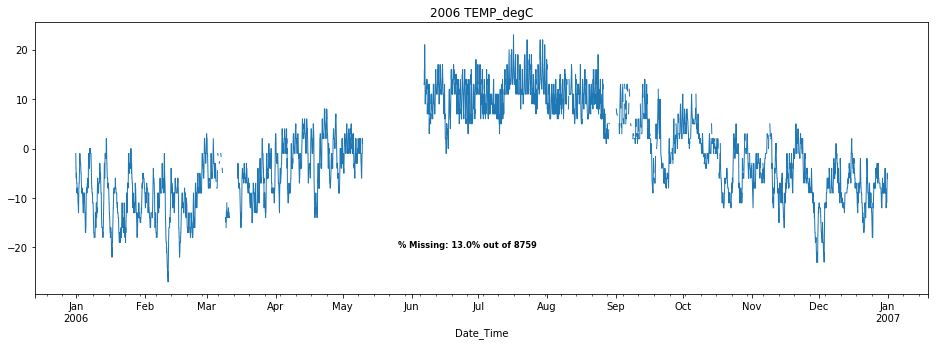

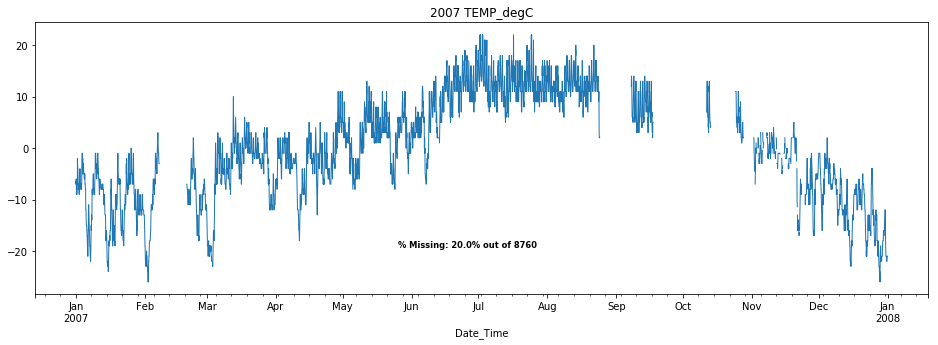

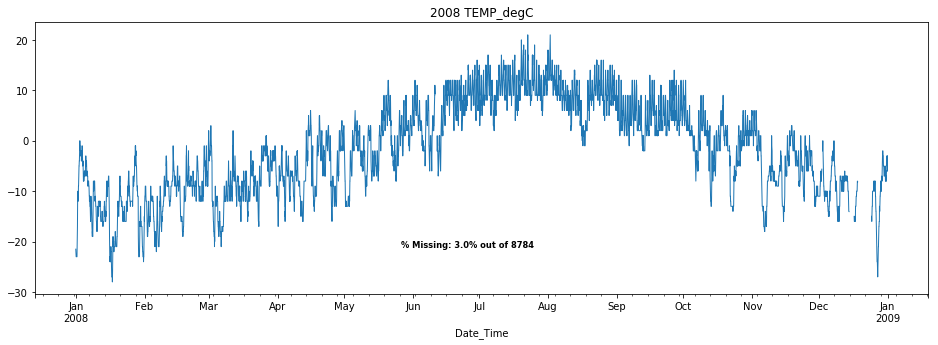

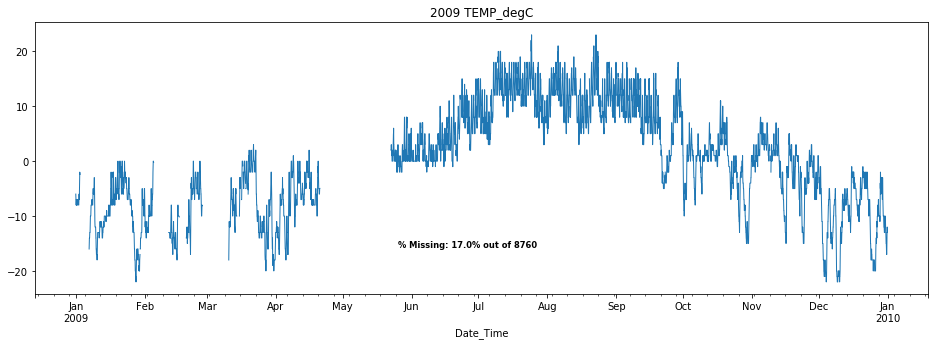

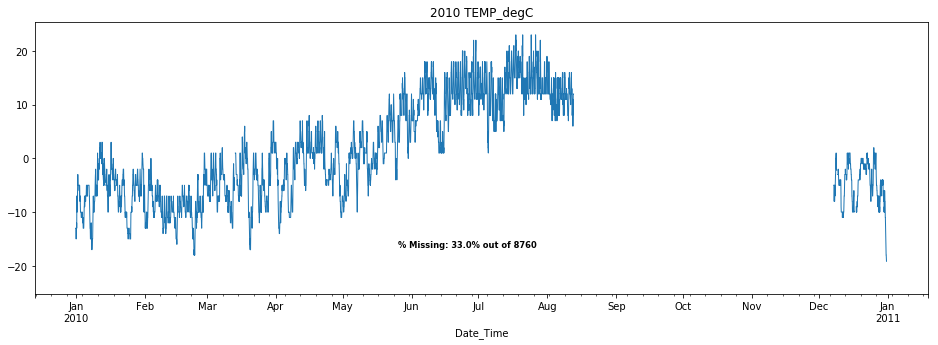

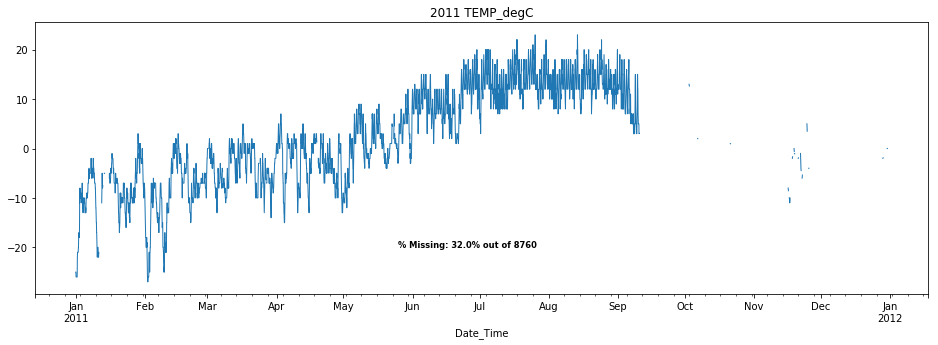

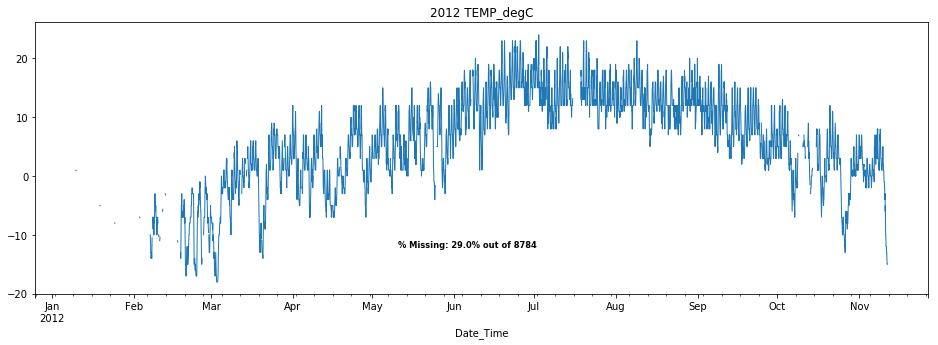

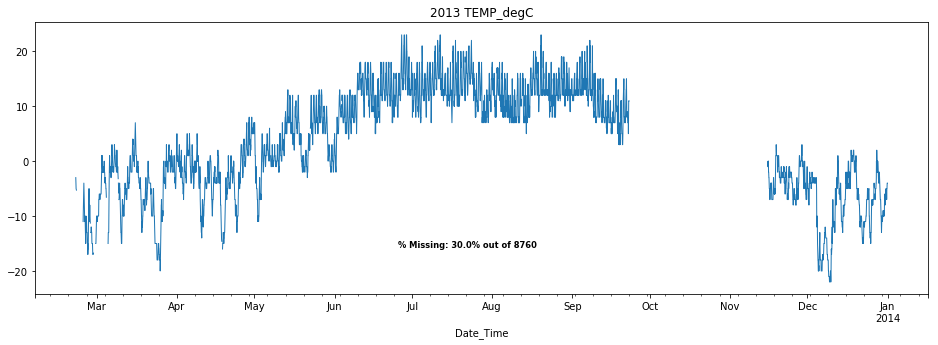

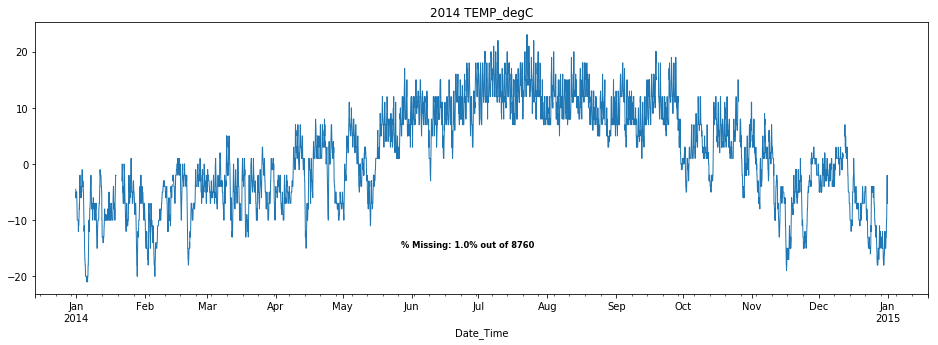

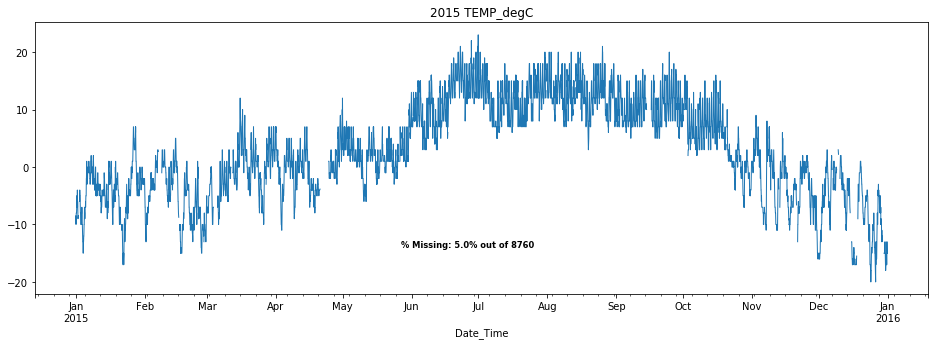

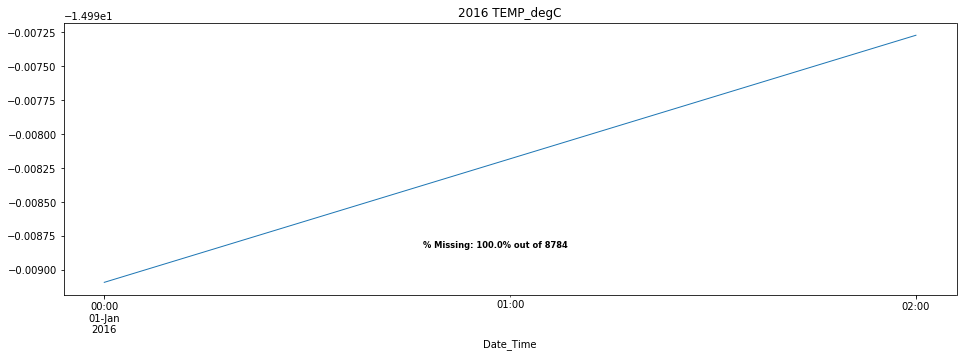

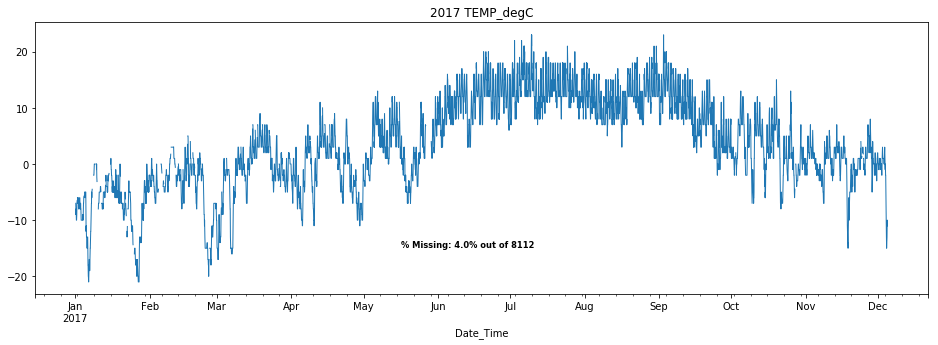

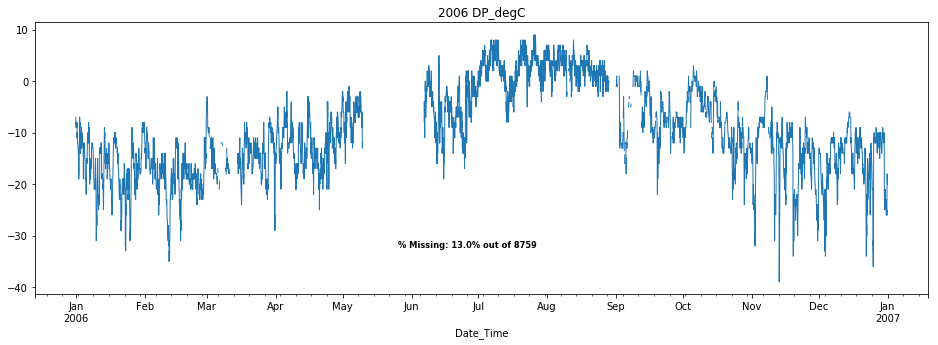

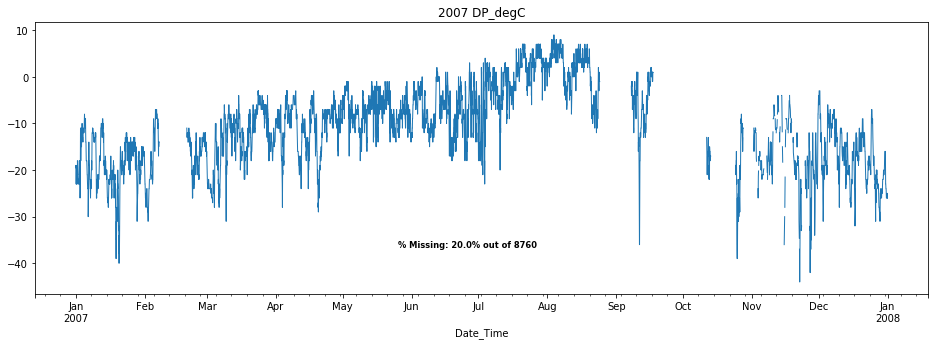

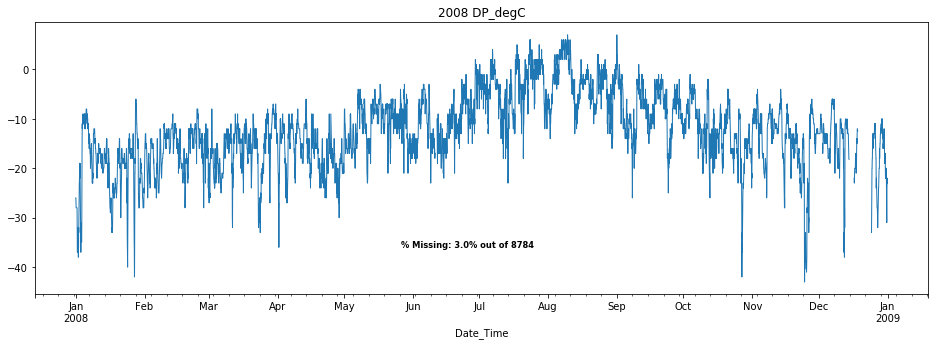

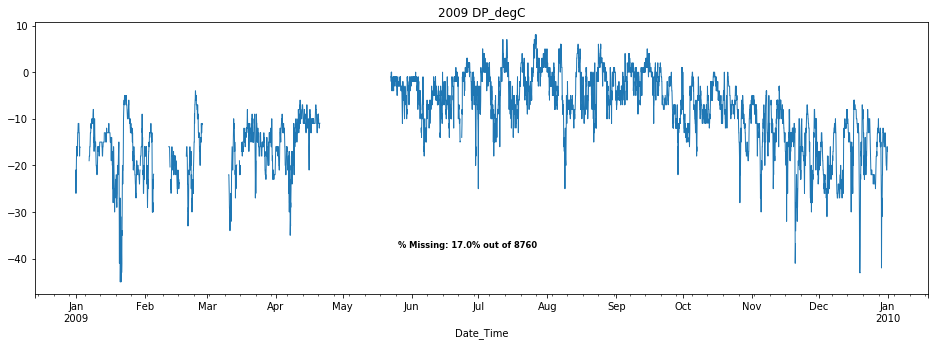

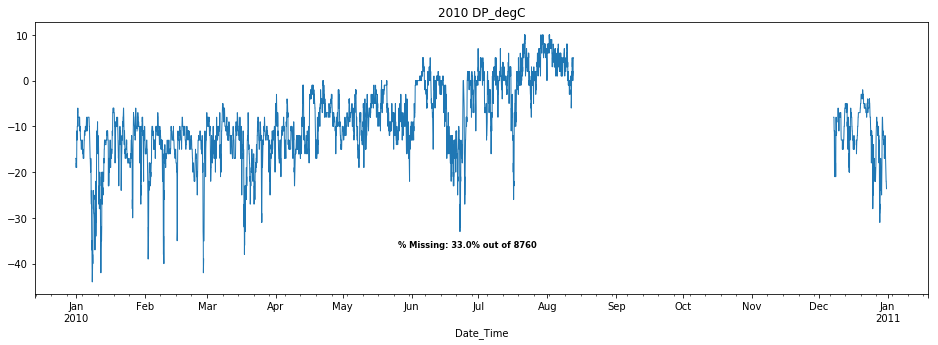

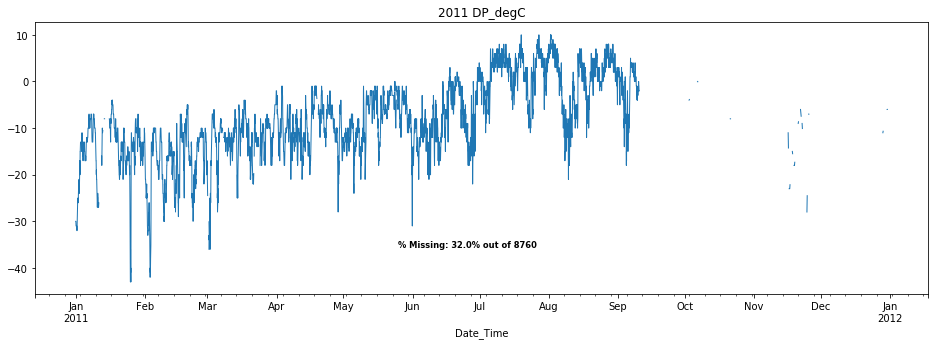

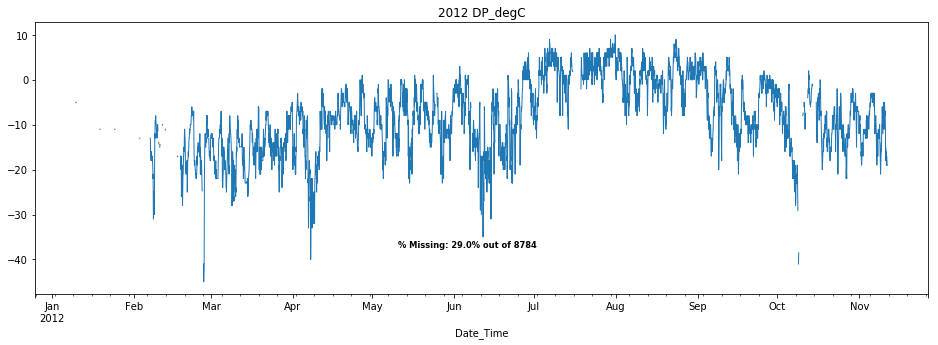

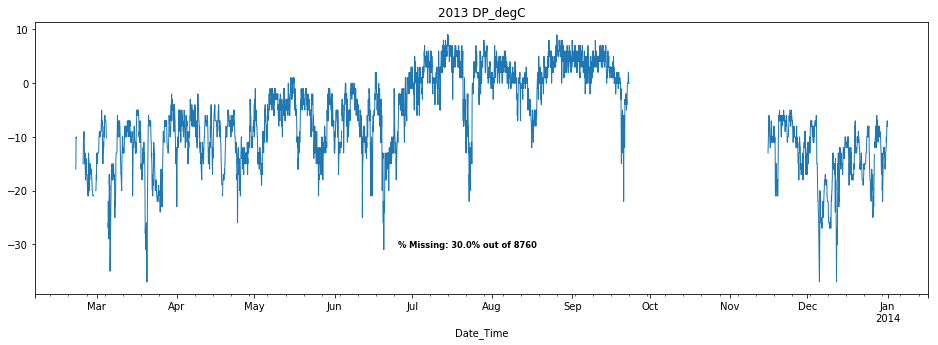

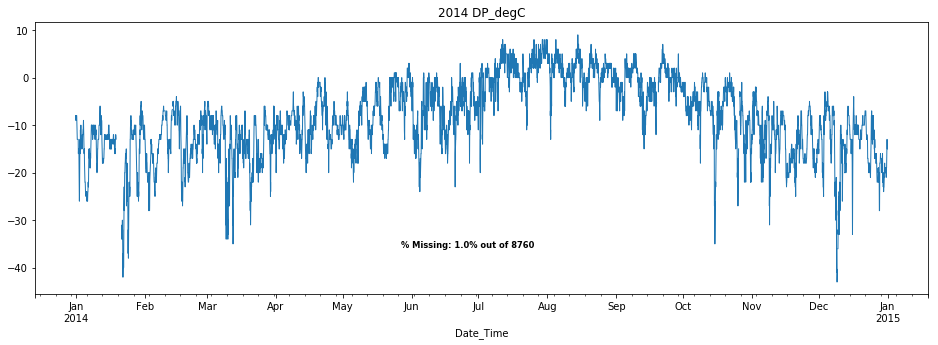

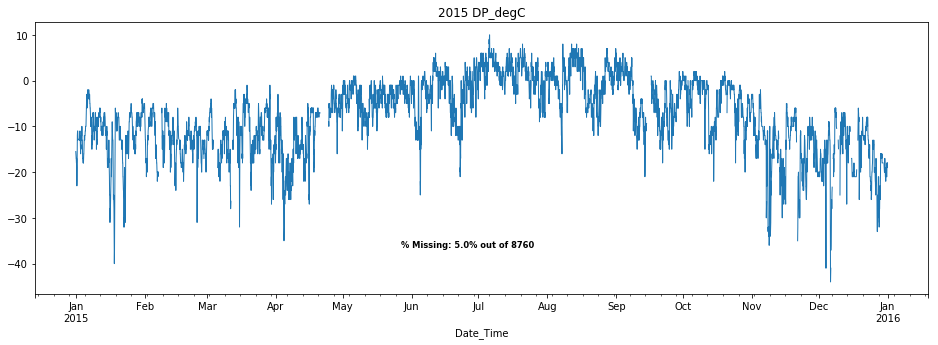

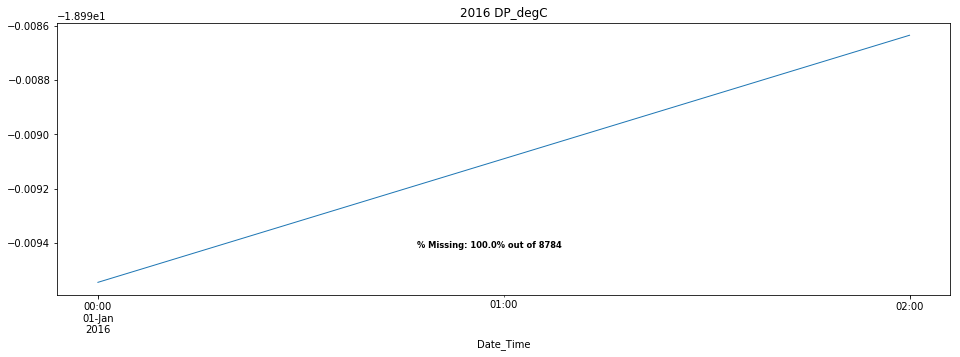

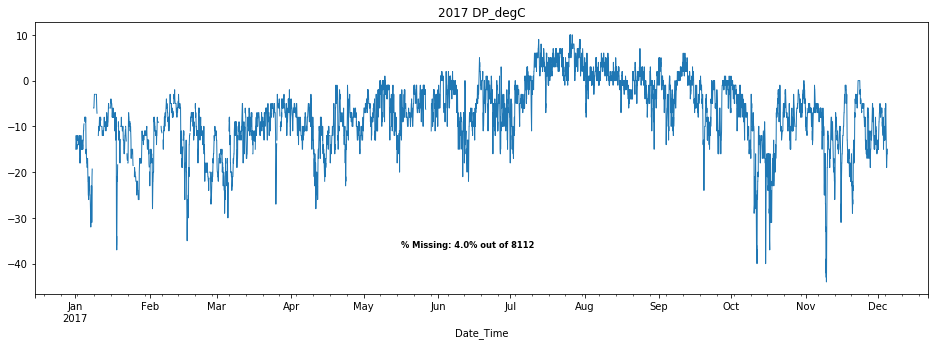

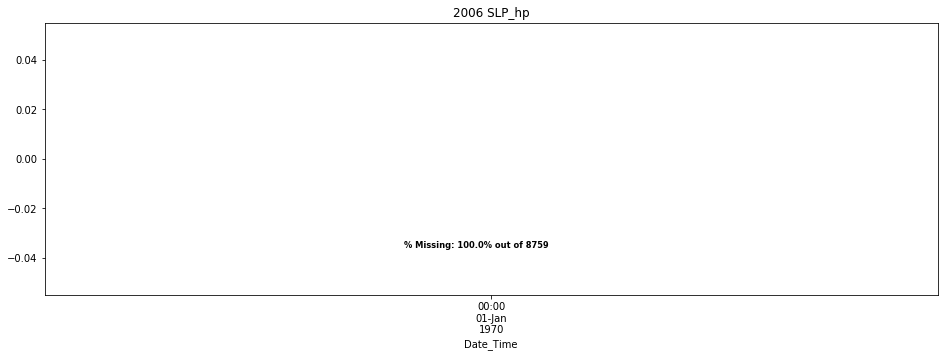

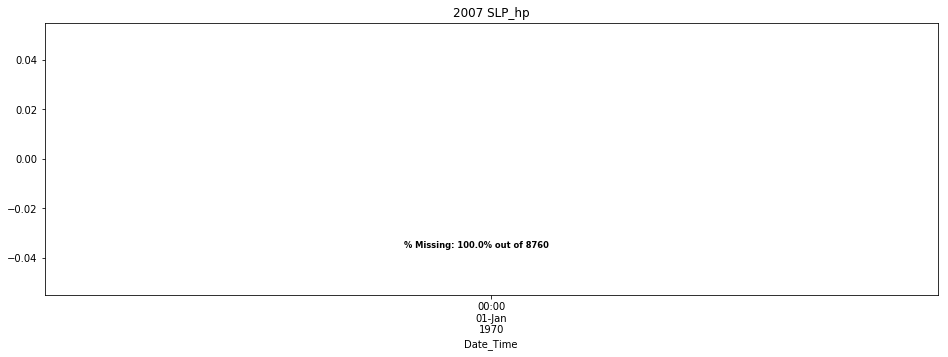

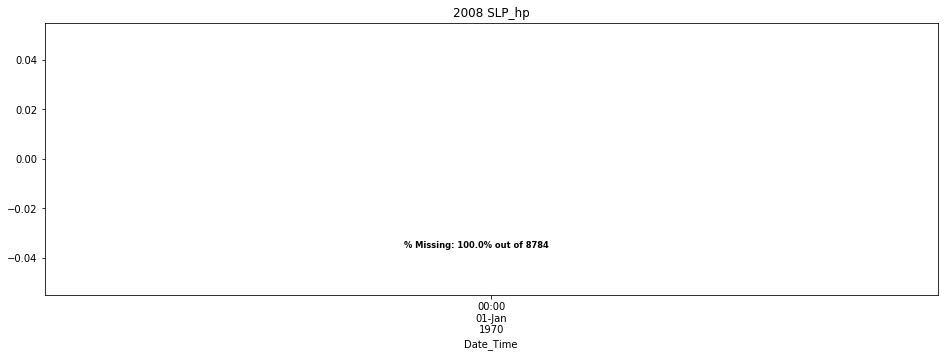

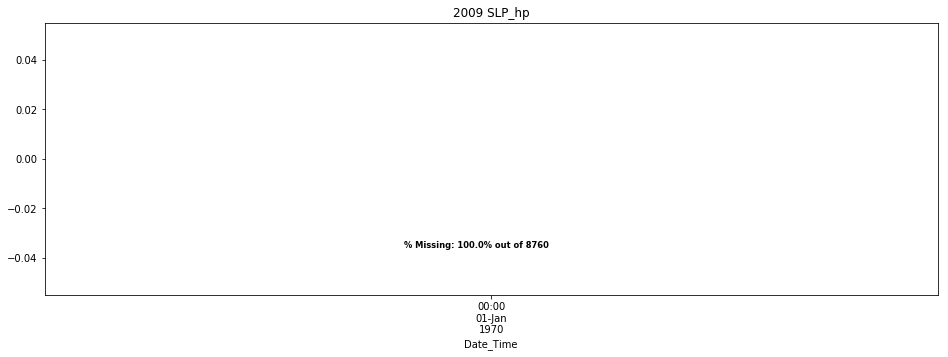

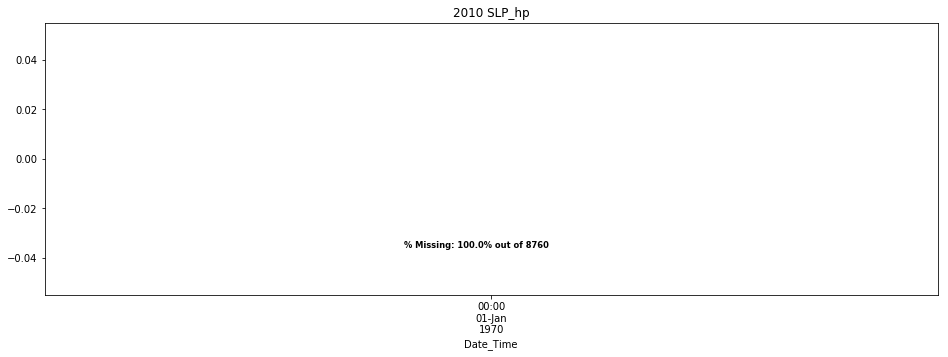

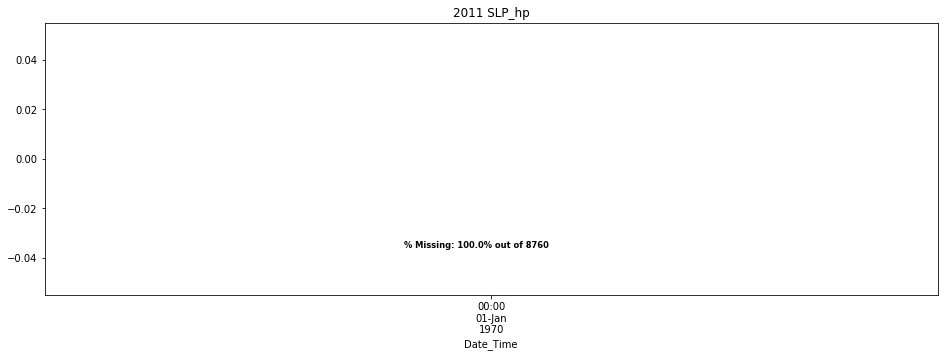

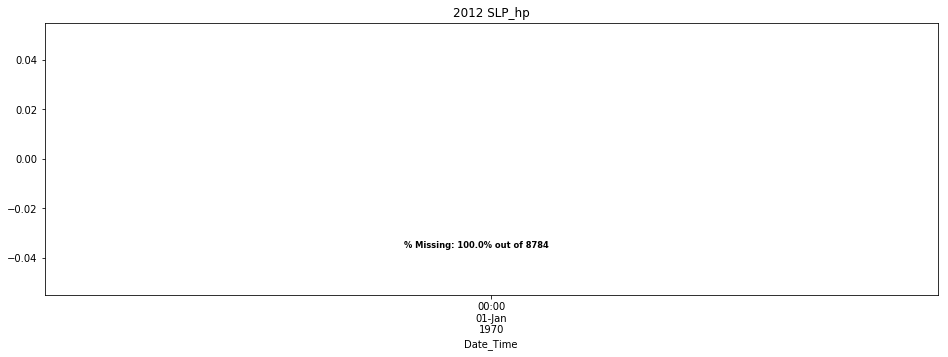

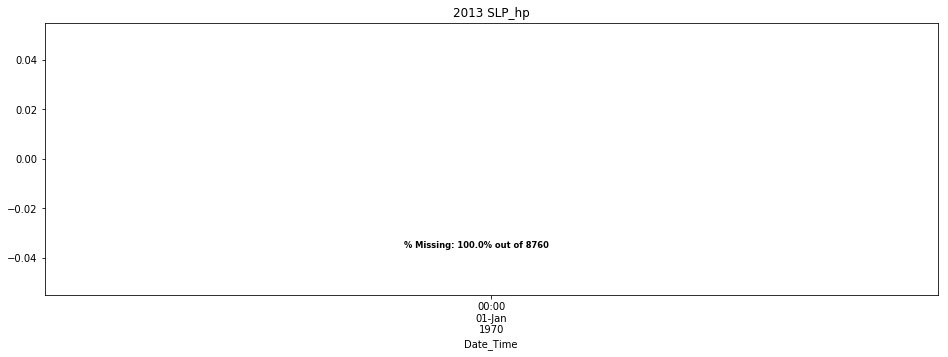

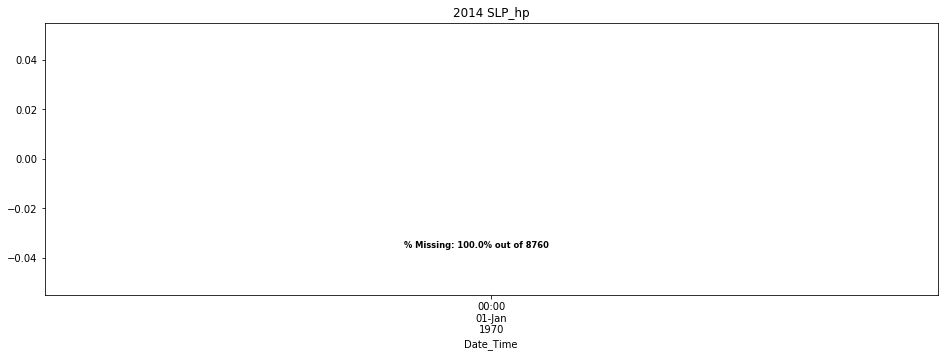

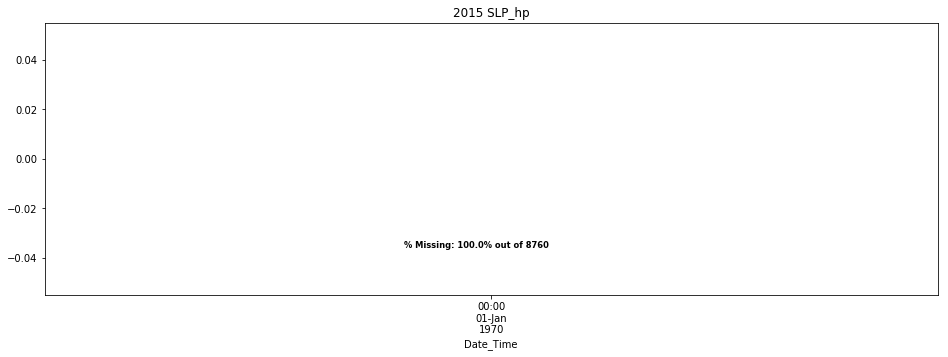

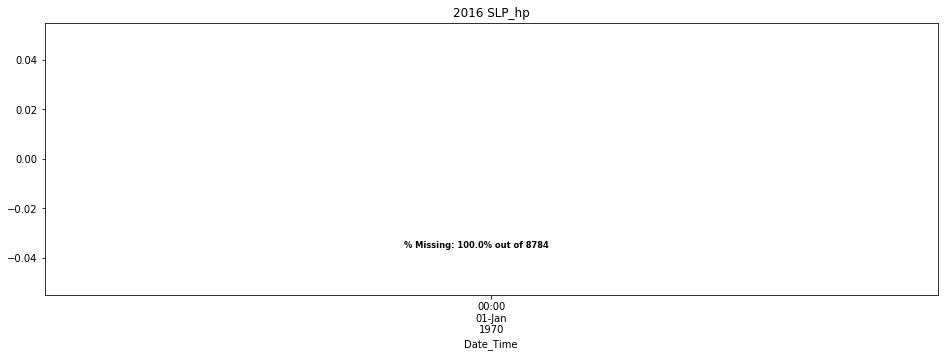

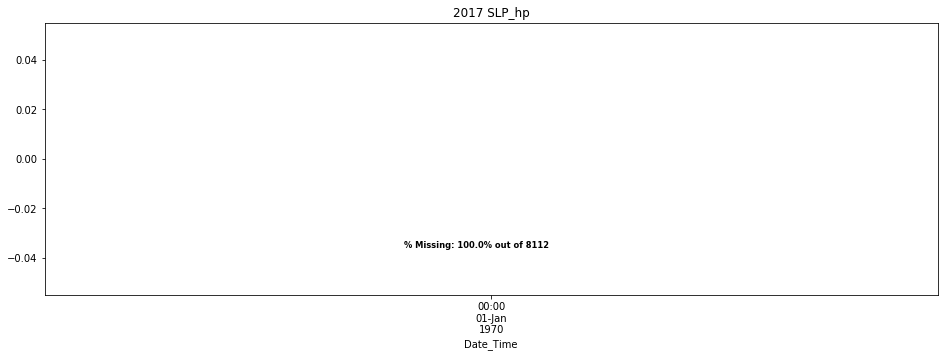

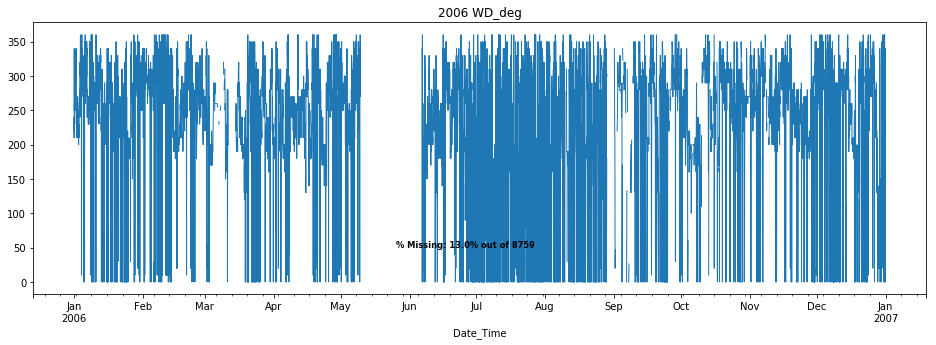

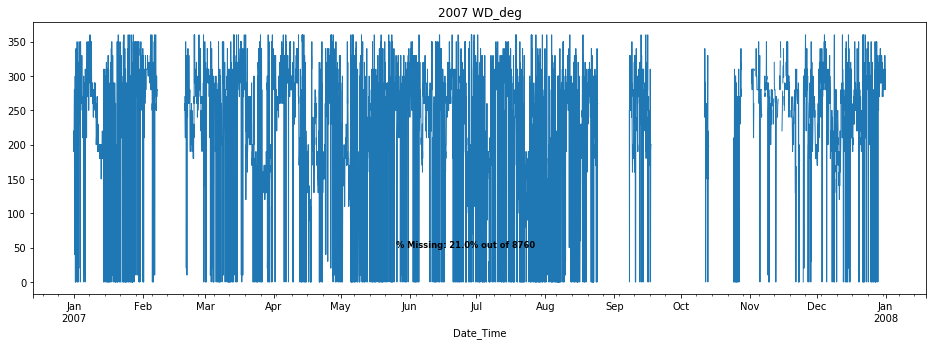

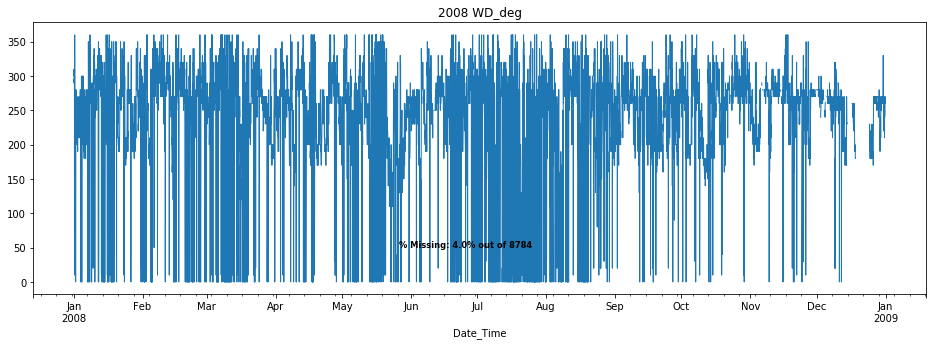

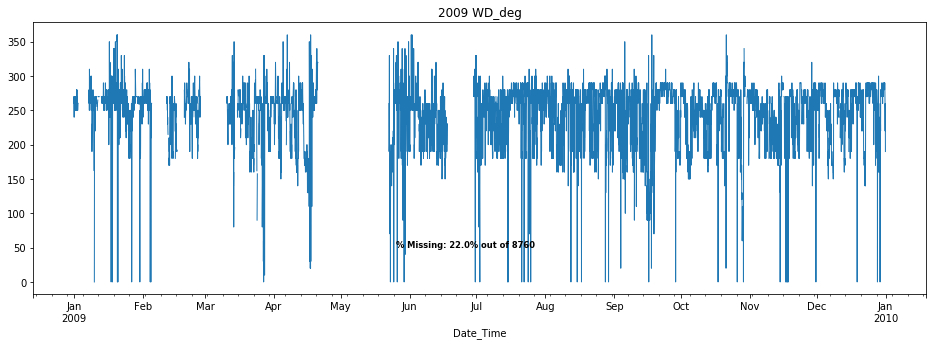

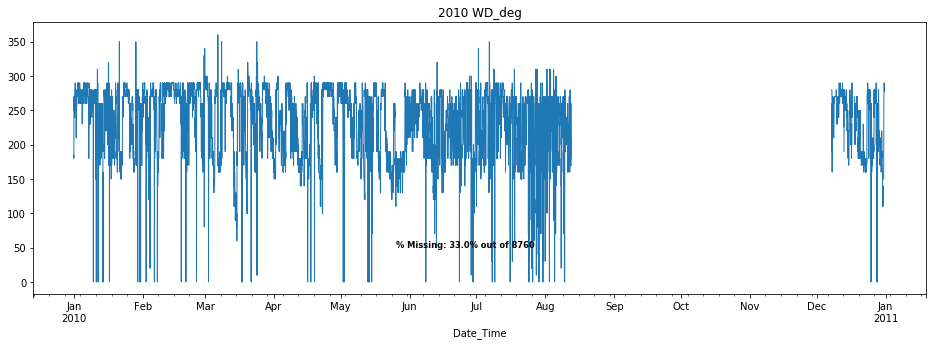

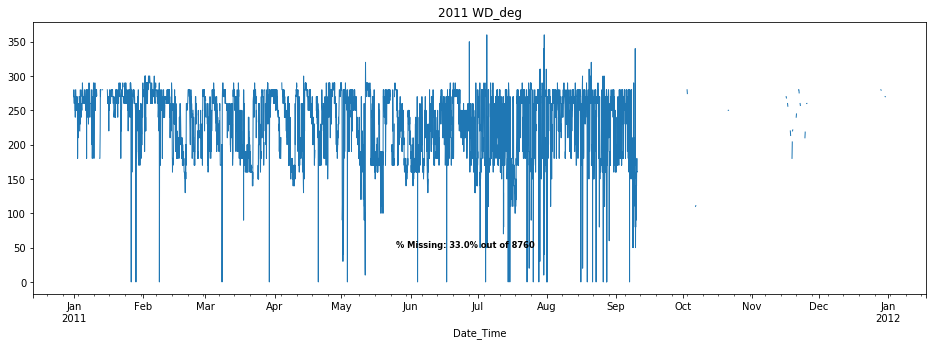

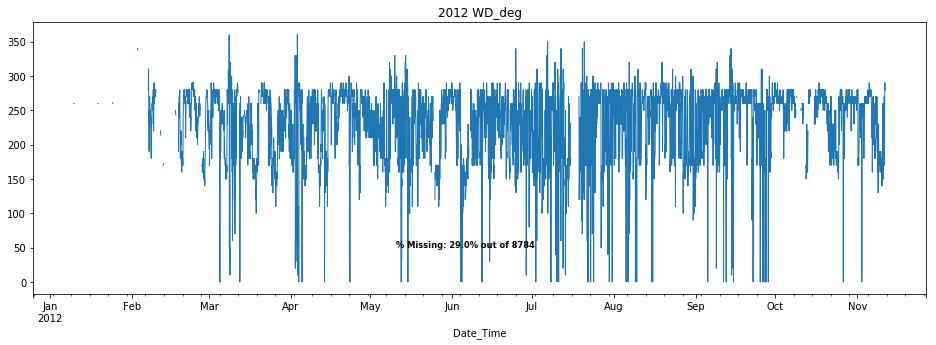

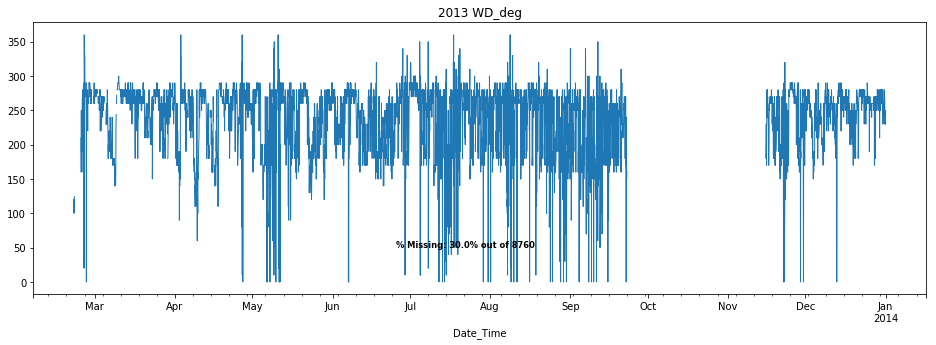

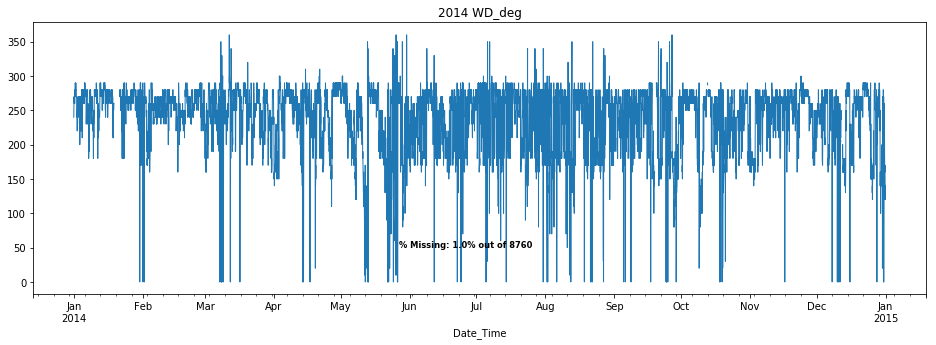

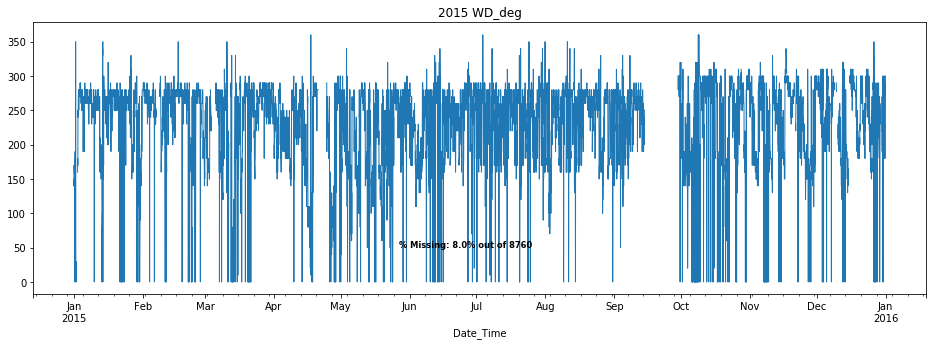

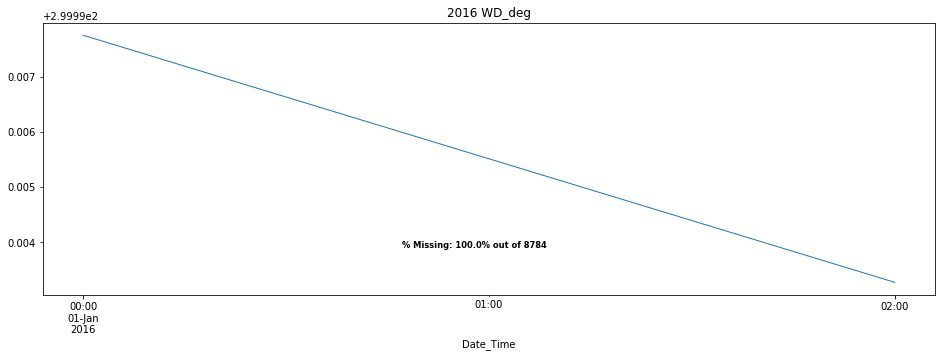

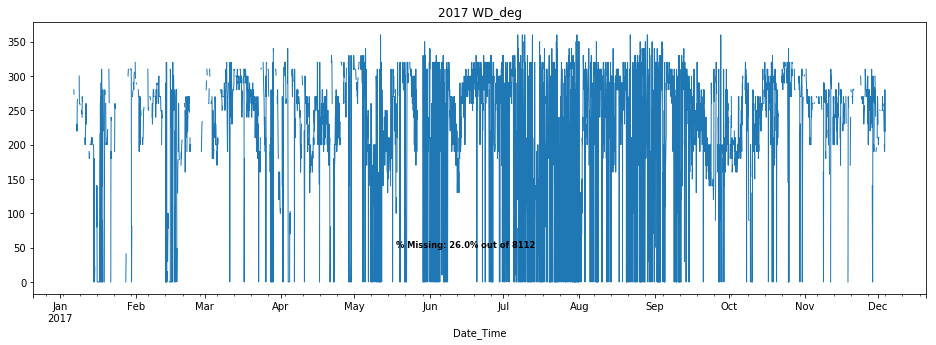

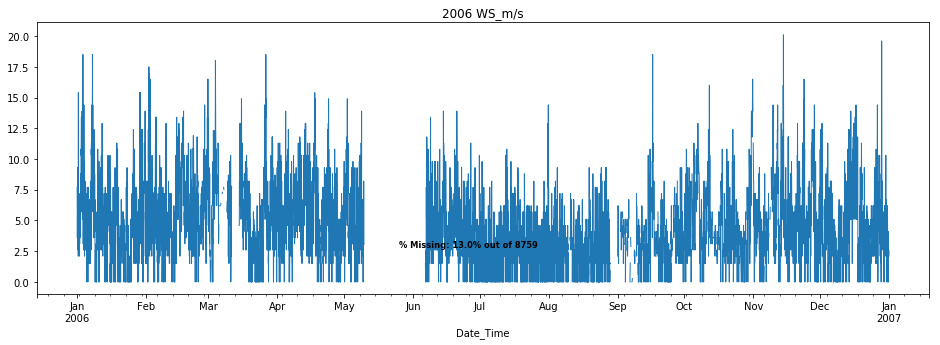

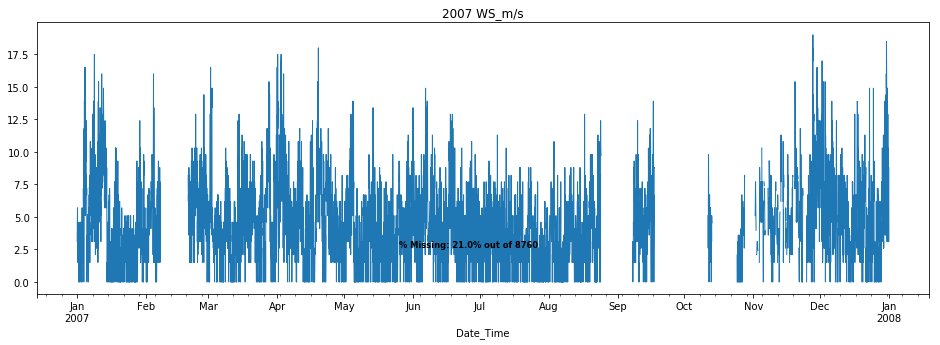

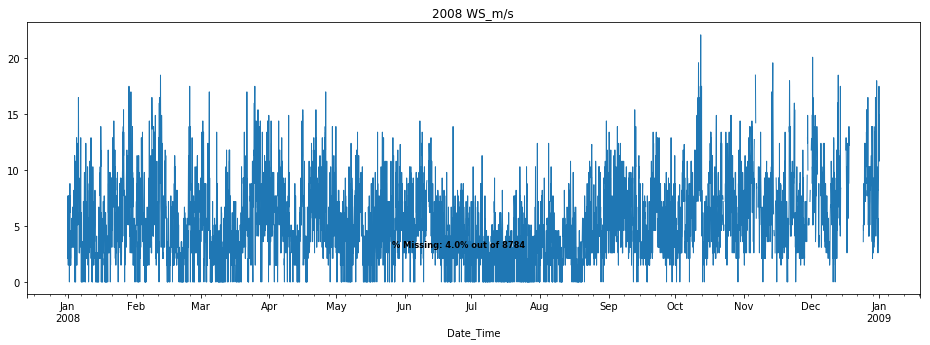

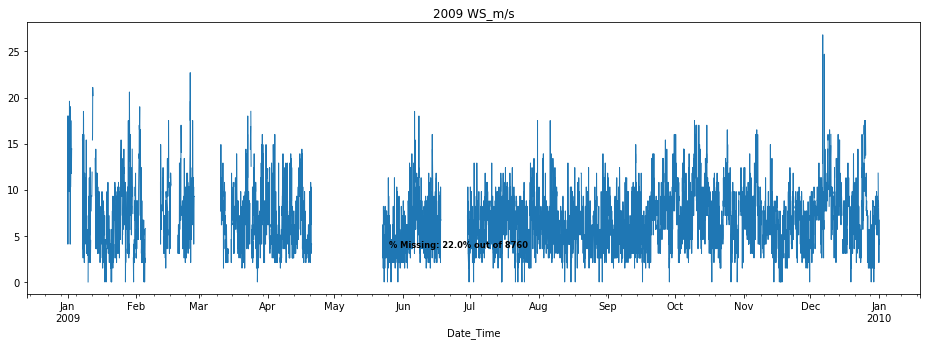

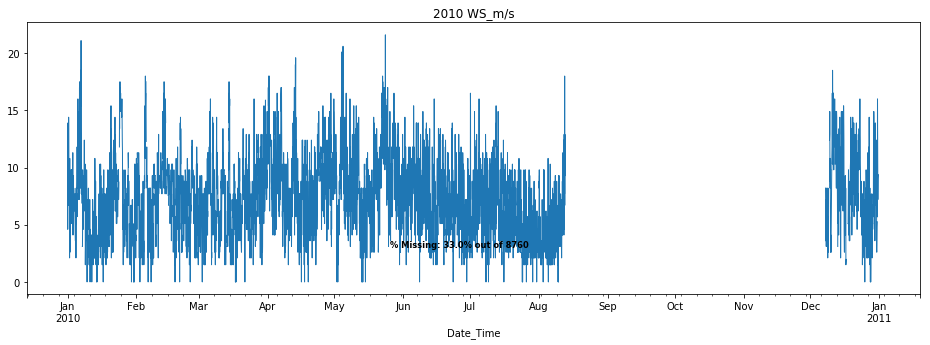

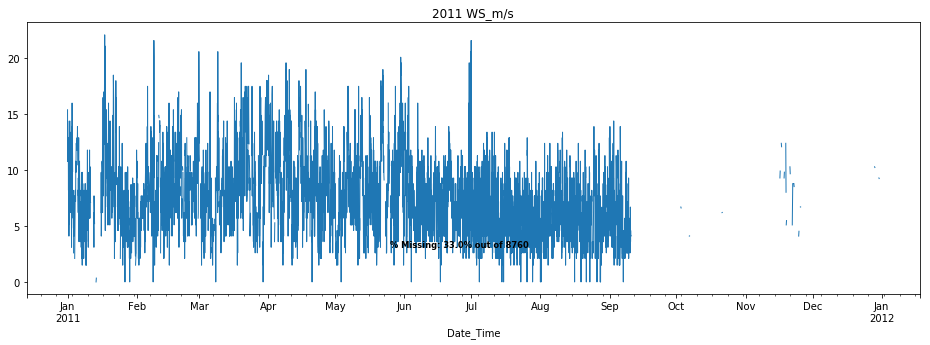

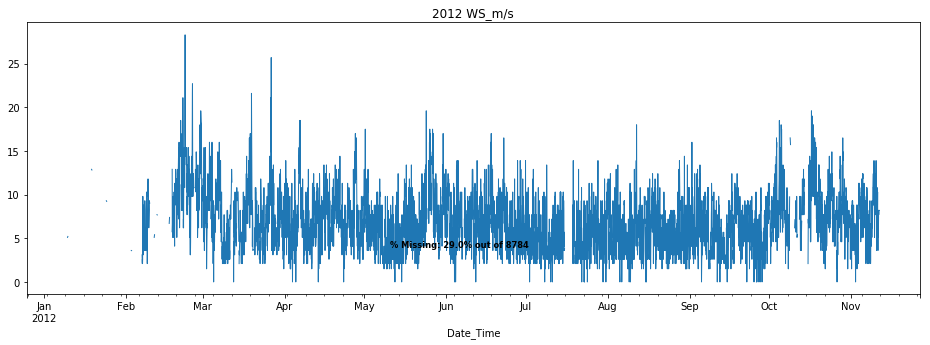

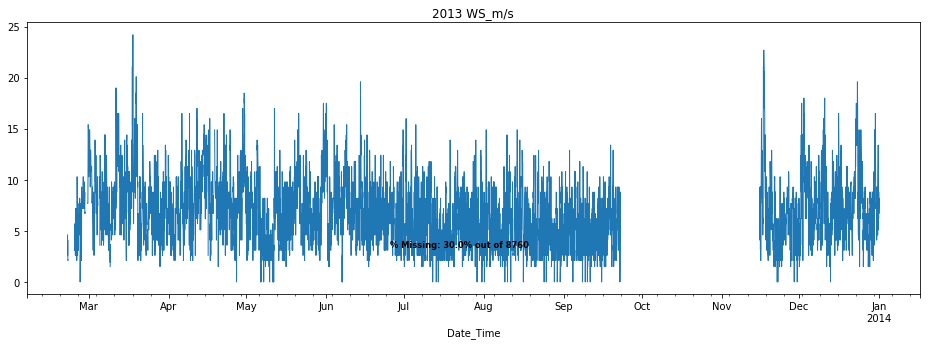

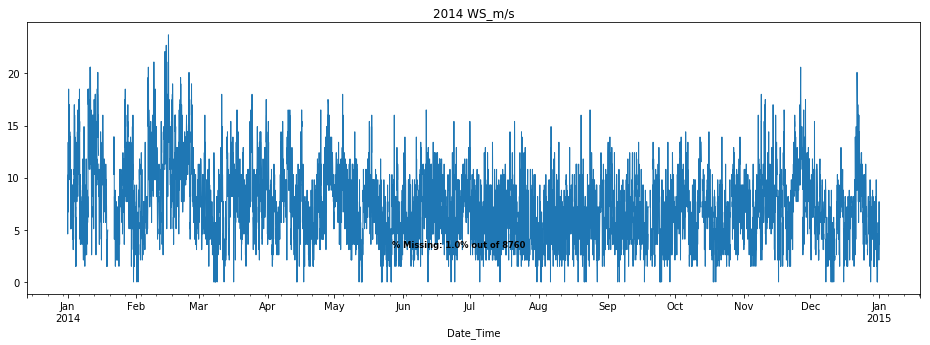

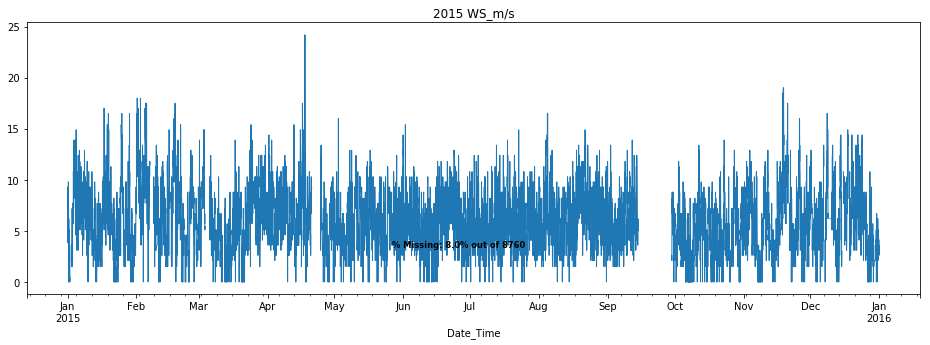

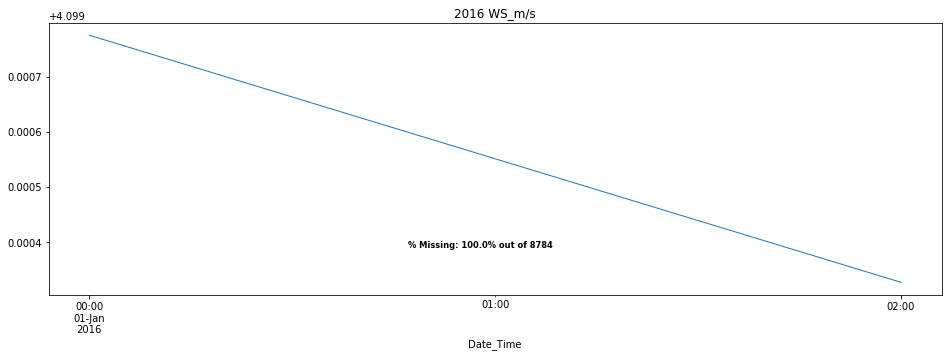

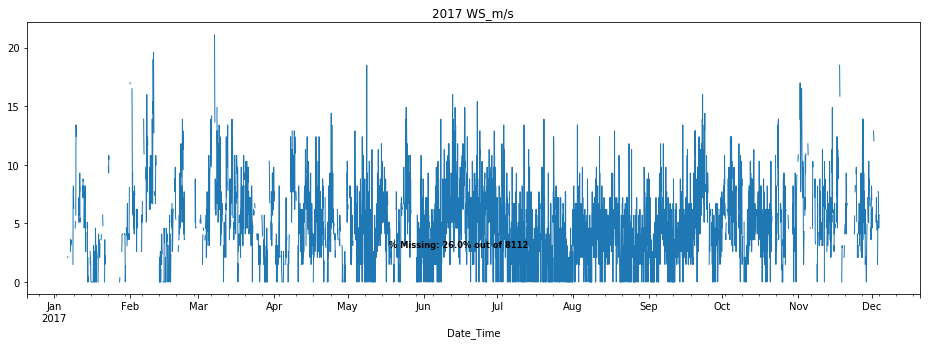

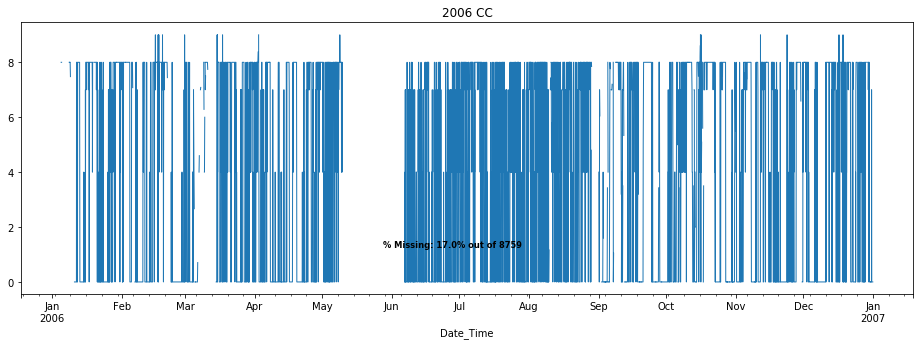

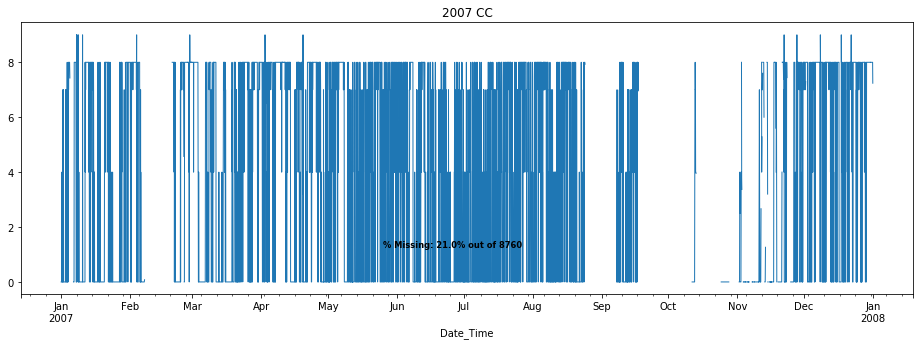

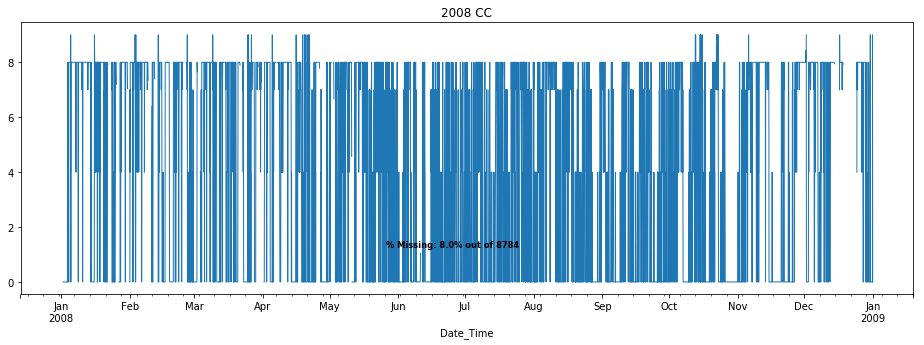

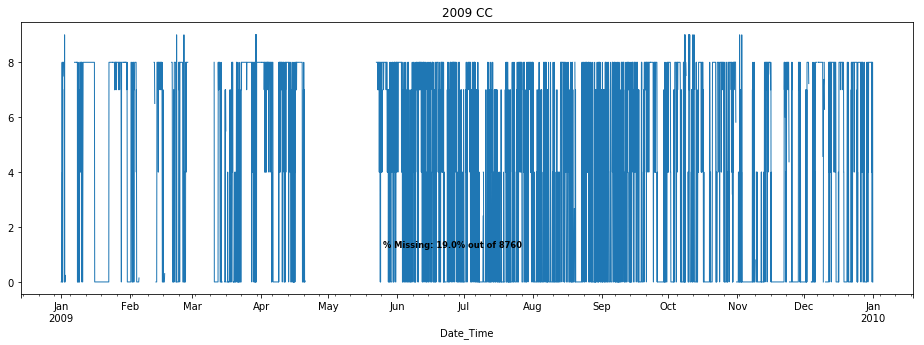

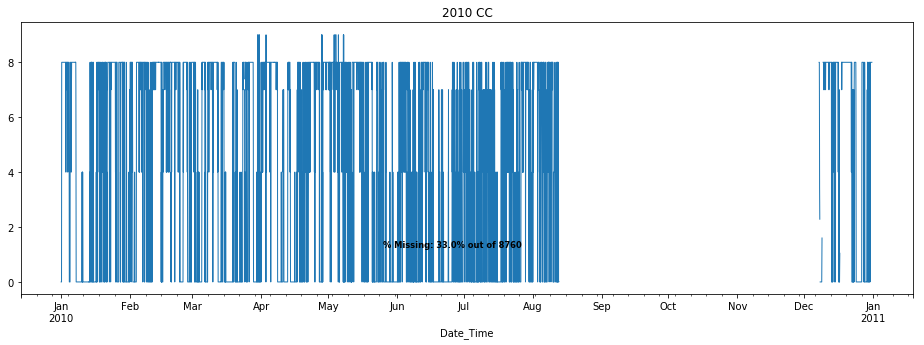

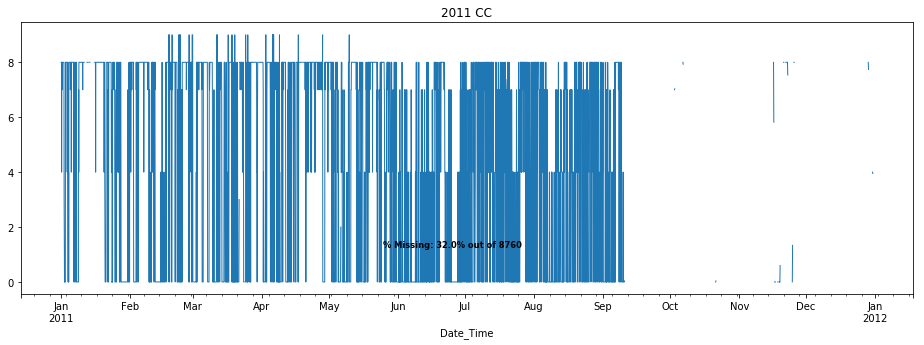

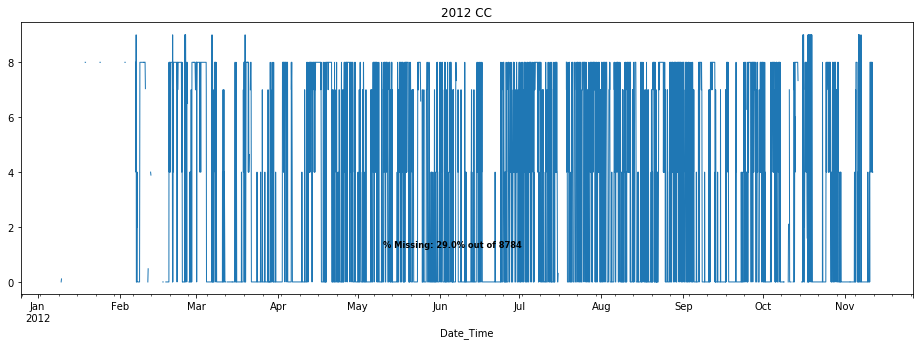

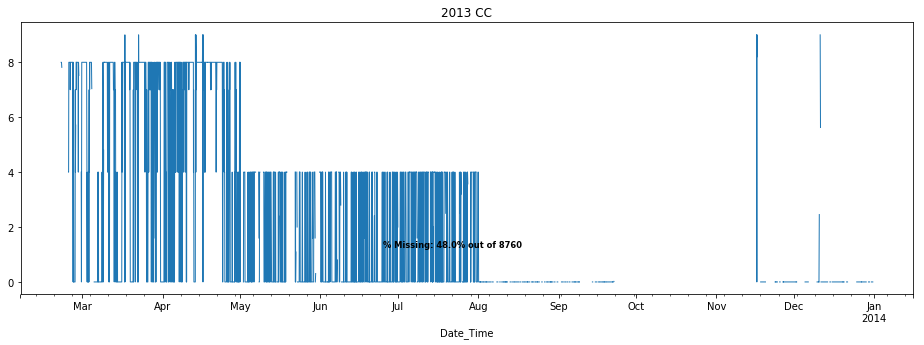

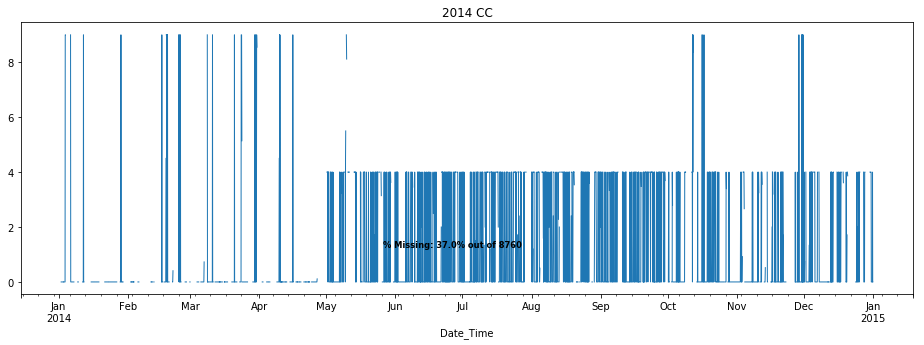

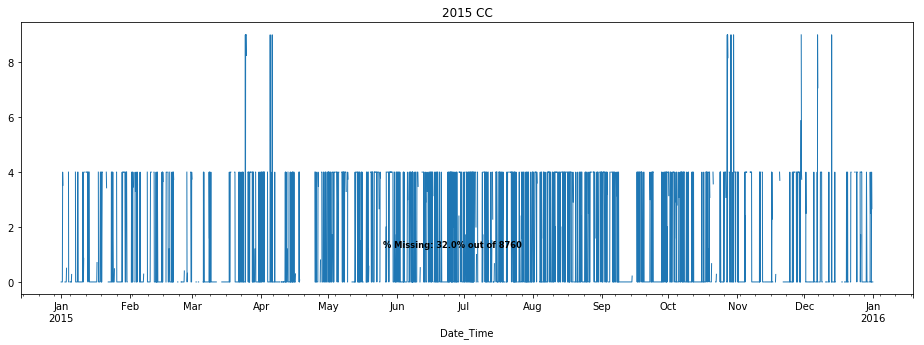

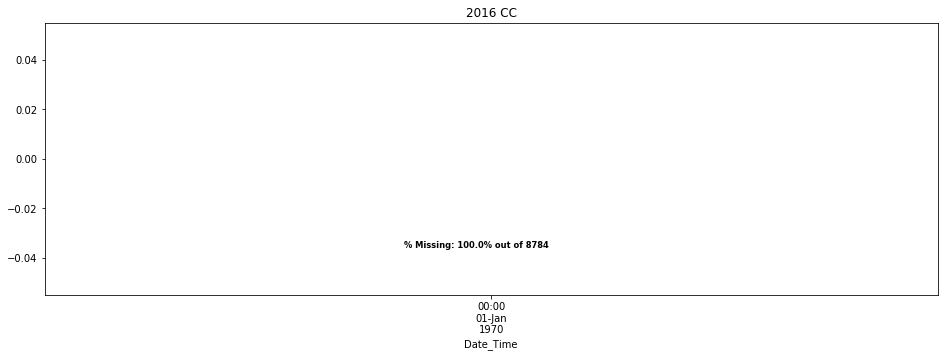

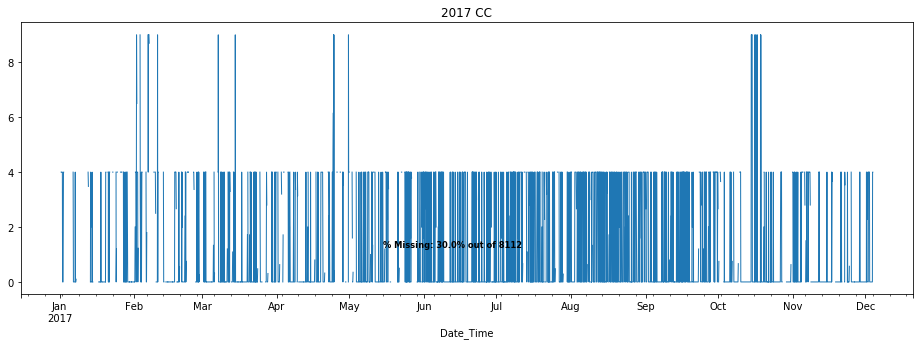

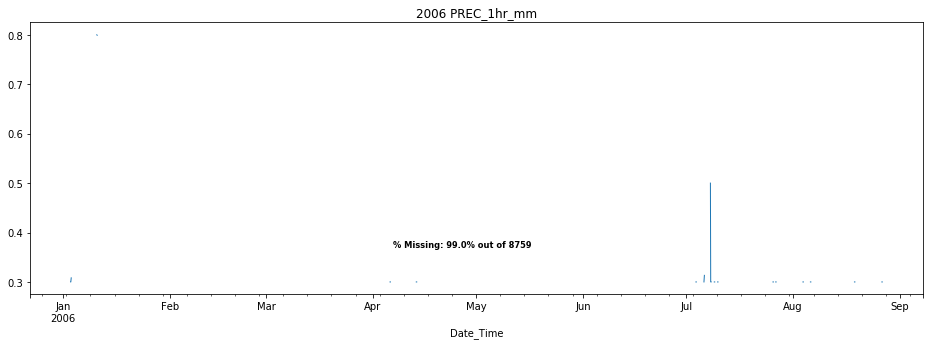

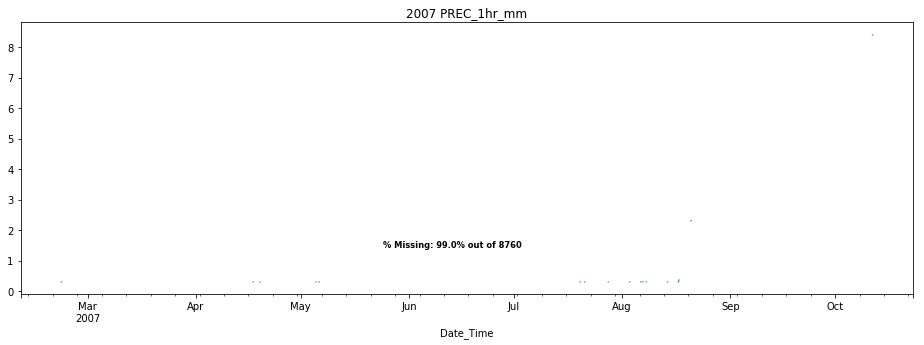

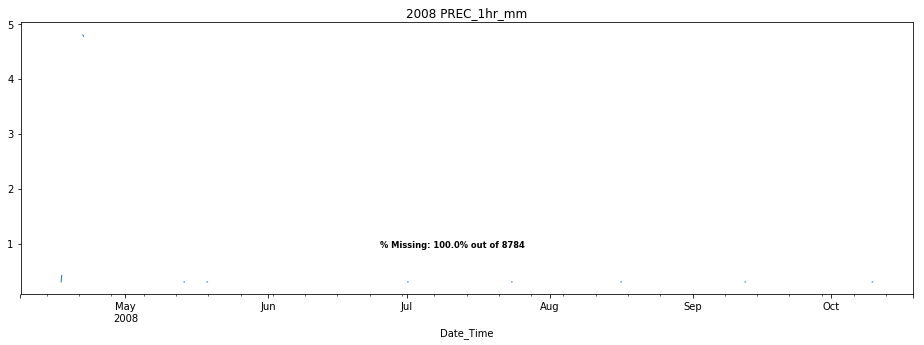

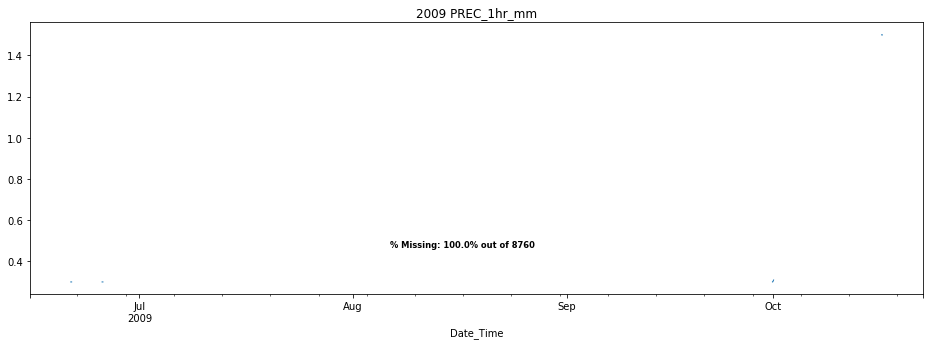

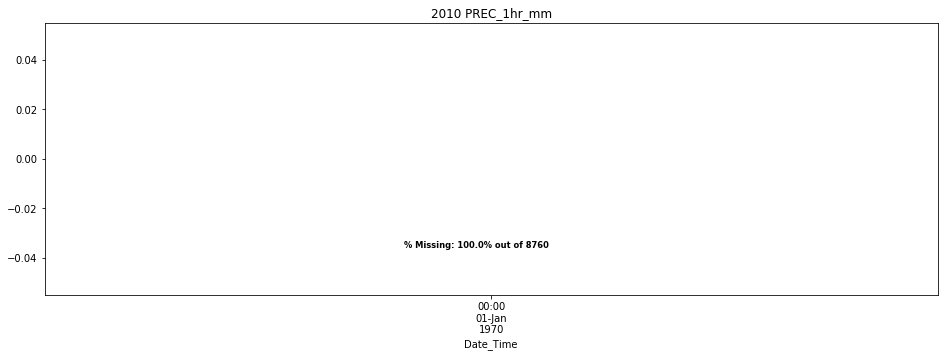

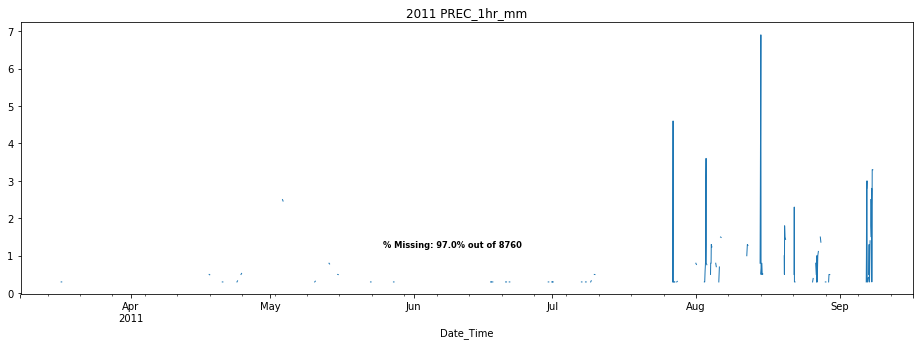

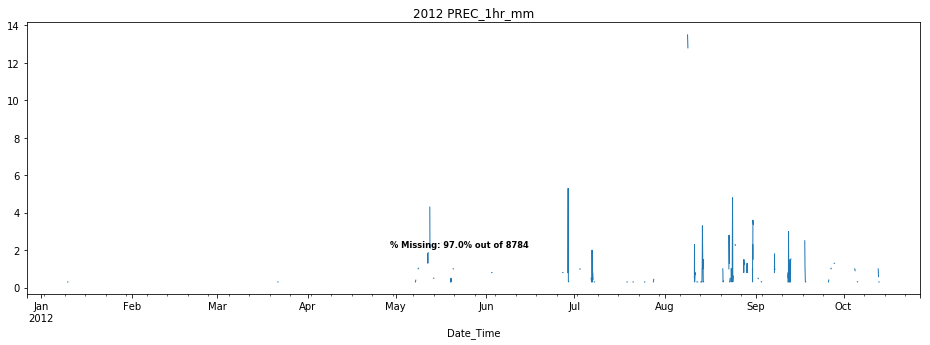

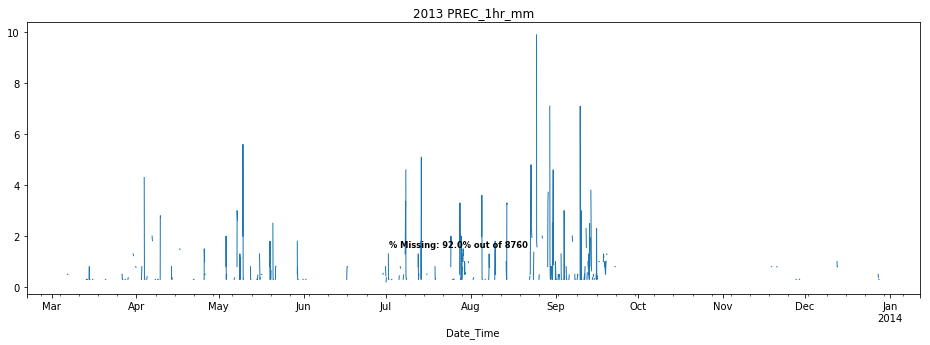

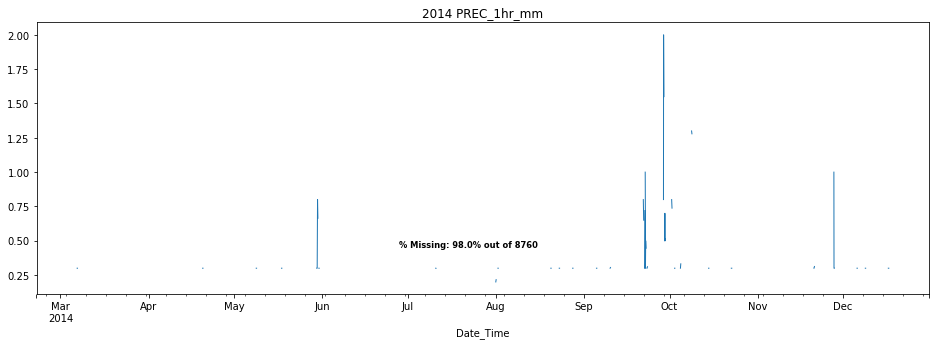

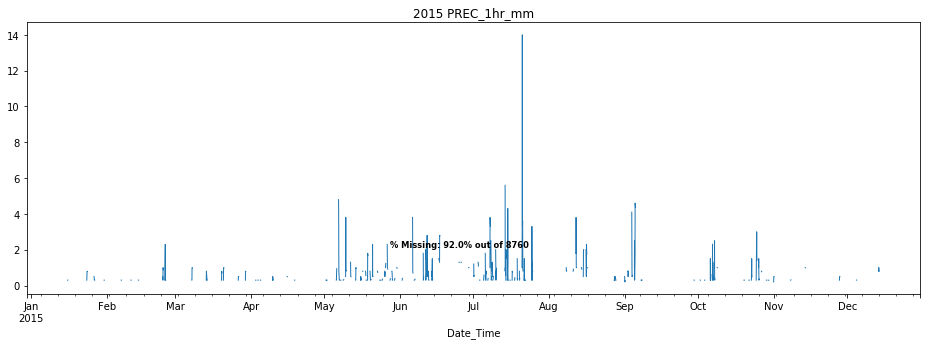

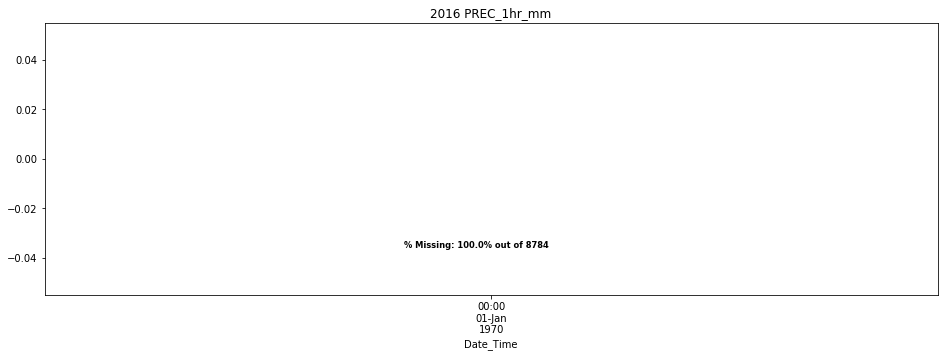

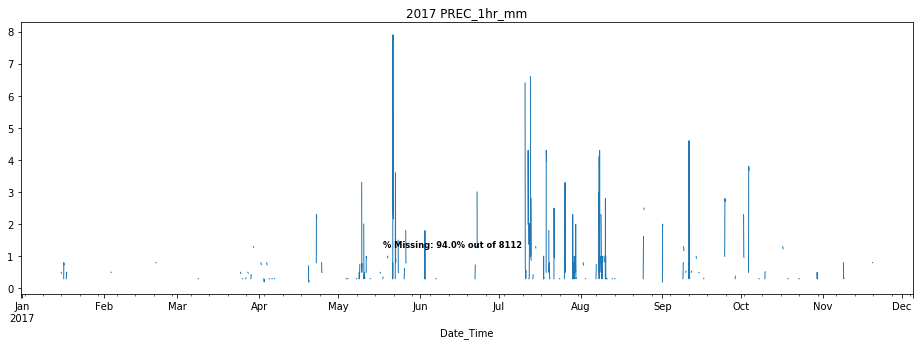

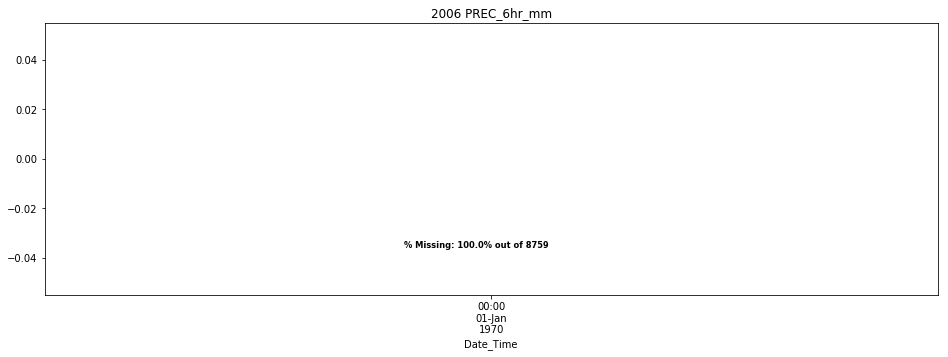

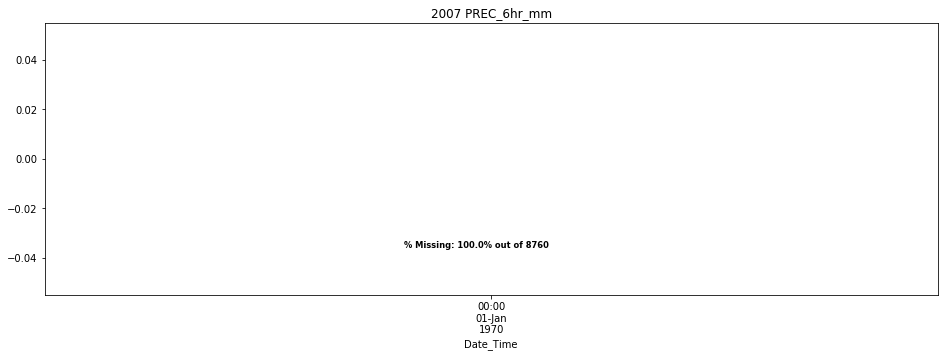

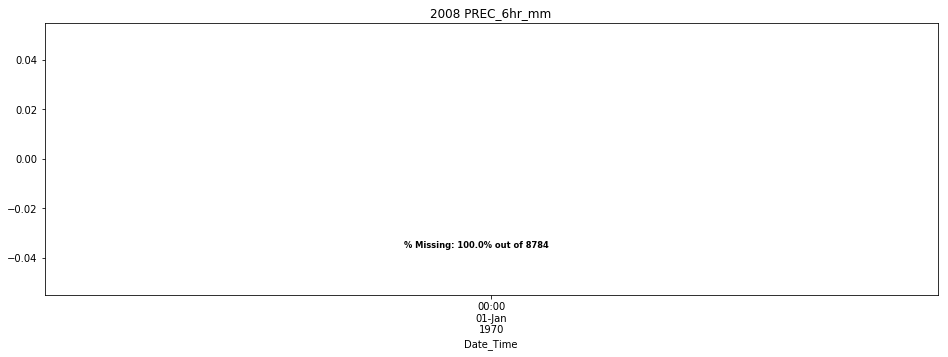

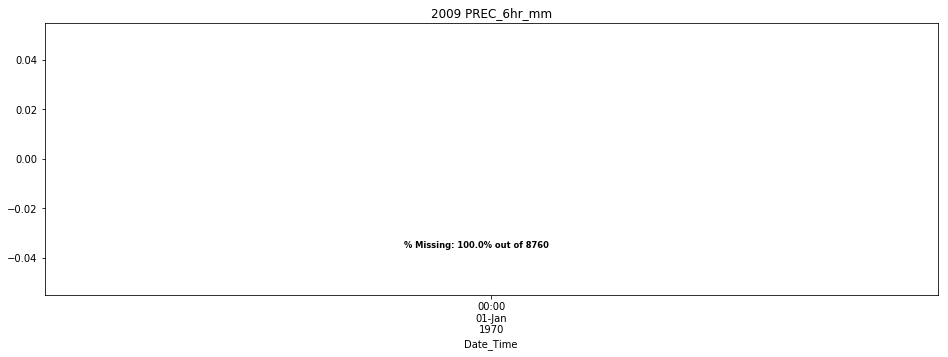

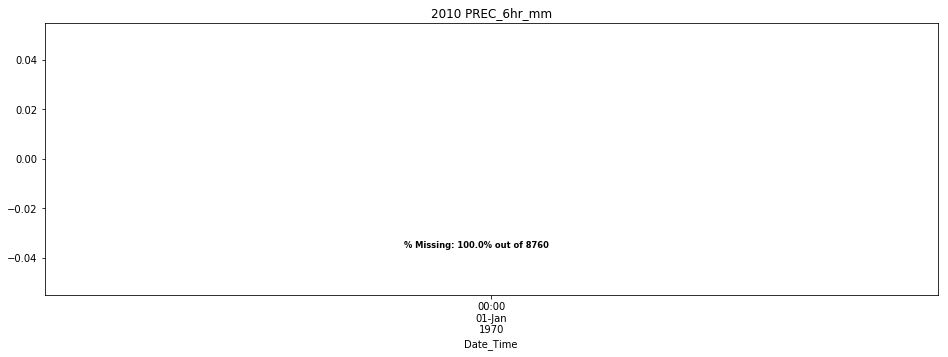

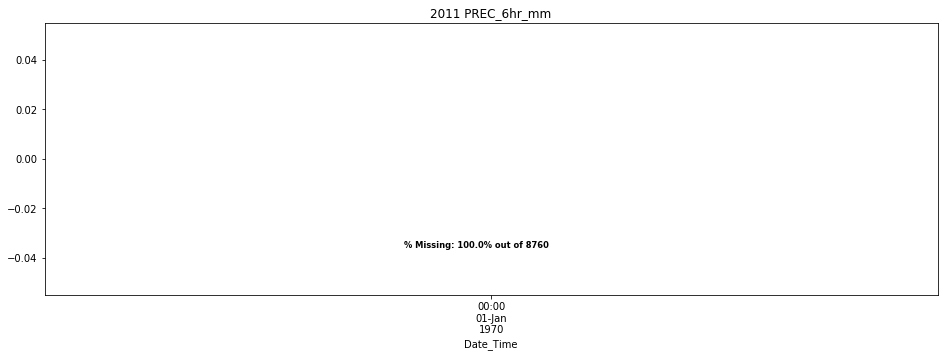

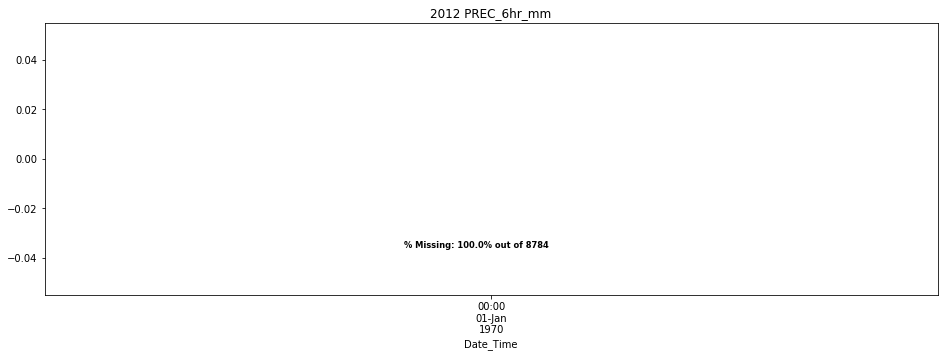

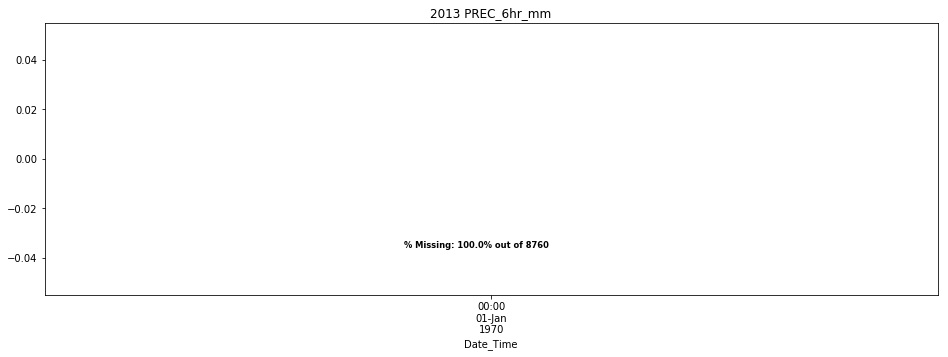

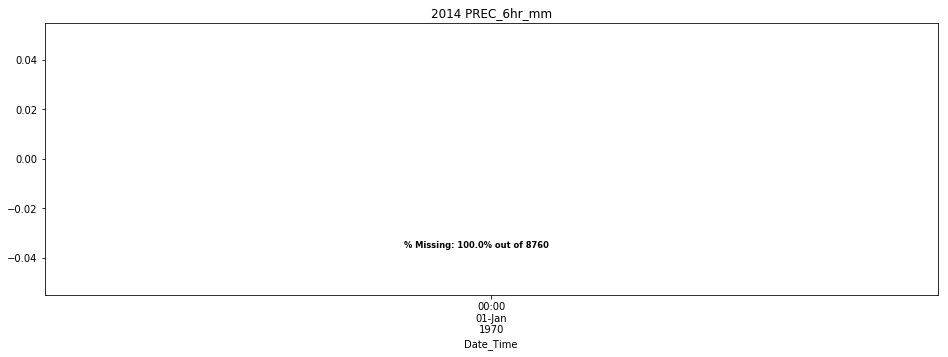

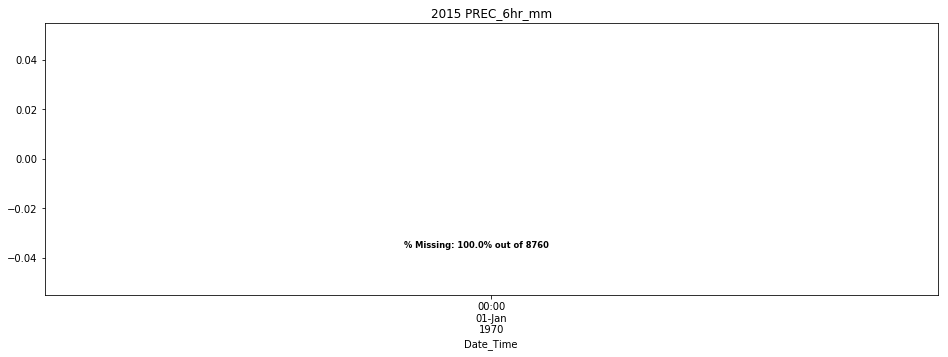

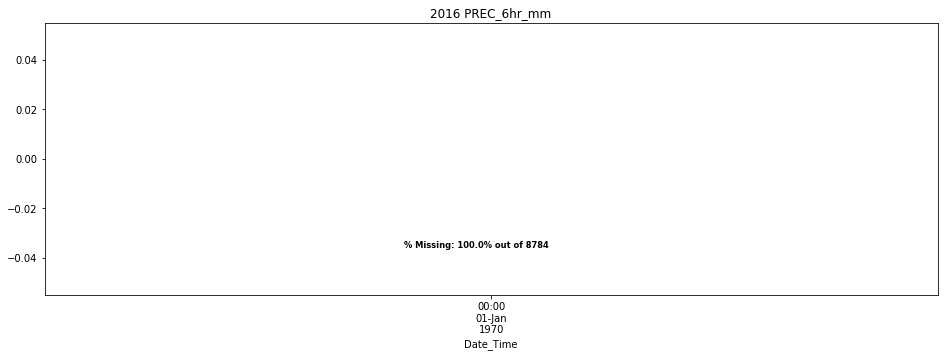

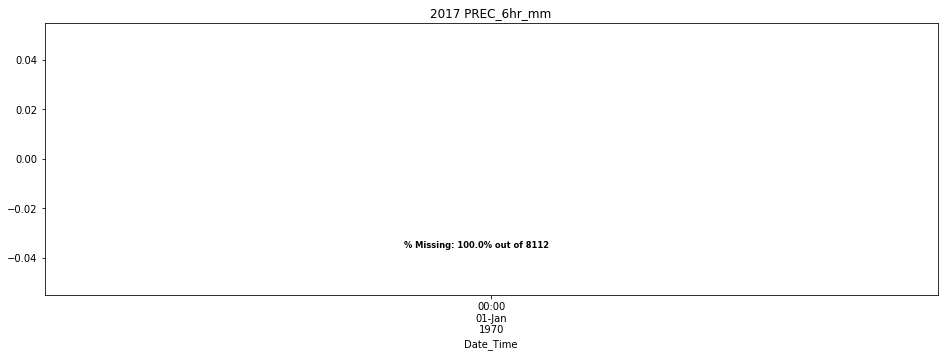

In [272]:
for key in asos_df.keys():

    for j in years:
        fig = plt.figure(figsize=(16,5))
        #Calculate % missing
        Missing = asos_df[key]['%04s' % (j)].isnull().sum()
        Possible = len(asos_df[key]['%04s' % (j)])
        Percent_Missing = str(round(Missing/Possible*100,))+ "% out of " + str(Possible)
        

        asos_df[key]['%04s' % j].plot(use_index=True, linewidth=1, figsize=(16,5))
        
        plt.title('%04s' % j + " " + key)
        #plt.text(10.6, 'Test', color='blue', bbox=dict(facecolor='none', edgecolor='blue', pad=10.0))
        fig.text(0.5, 0.25, "% Missing: " + Percent_Missing, verticalalignment='bottom', horizontalalignment='center', size='small', color='black', weight='semibold')

        plt.show()

**Finally, save the asos dataframe into a tab delimited file.  Missing values set to -999.0**

In [276]:
asos_df.to_csv('asos_df.dat',sep = '\t', float_format = '%.2f', na_rep = -999.0)